In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/interim/0_whole_dataset_wo_object_cols.csv')

In [4]:
df.head()

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
0,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,953
1,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,24
2,4.0,False,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,57
3,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,65
4,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93


In [5]:
df.describe()

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
count,994.000000,994.000000,167.000000,164.000000,166.000000,975.000000,941.000000,461.000000,998.000000,679.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,1017.000000
mean,3.508048,0.168008,1.808383,3.946341,1.481928,38.357969,30.824957,4.866269,0.680361,0.007364,...,0.104167,0.125000,0.291667,0.125000,0.041667,0.666667,0.187500,0.020833,0.375000,871.417896
std,1.989002,0.374062,1.532516,4.620216,0.829186,12.319913,12.430551,6.261308,0.466571,0.085559,...,0.308709,0.334219,0.459340,0.334219,0.201941,0.476393,0.394443,0.144338,0.489246,502.363433
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2.000000,0.000000,1.000000,1.000000,1.000000,32.000000,20.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000
50%,3.000000,0.000000,1.000000,2.250000,1.000000,40.000000,35.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,872.000000
75%,5.000000,0.000000,2.000000,4.250000,2.000000,45.000000,40.000000,5.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1301.000000
max,10.000000,1.000000,11.000000,25.000000,5.000000,100.000000,150.000000,50.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1734.000000


In [6]:
df.describe().to_csv('../data/interim/1_data_description.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Columns: 836 entries, AP1. Wie alt sind Sie? to id. Antwort ID
dtypes: bool(361), float64(423), int64(52)
memory usage: 4.0 MB


In [8]:
df_numerical = df.select_dtypes(include='number')

In [9]:
df_numerical.head()

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
0,2.0,0.0,NaN,NaN,NaN,39.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953
1,2.0,0.0,NaN,NaN,NaN,39.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
2,4.0,0.0,NaN,NaN,NaN,30.0,NaN,10.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
3,2.0,0.0,NaN,NaN,NaN,19.5,19.5,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
4,2.0,0.0,NaN,NaN,NaN,39.0,15.0,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93


## visualize outliers via boxplots

### first group the questions together

In [10]:
# take the prefixes until the first dot
prefixes = set(col.split('.')[0] for col in df_numerical.columns)


In [11]:
prefixes

{'AP1',
 'AP10',
 'AP10r[SQ001]',
 'AP10r[SQ002]',
 'AP10r[SQ003]',
 'AP11[SQ001]',
 'AP11r[SQ001]',
 'AP12r[SQ001]',
 'AP13',
 'AP13r[SQ001]',
 'AP13r[SQ002]',
 'AP13r[SQ003]',
 'AP13r[SQ004]',
 'AP13r[SQ005]',
 'AP13r[SQ006]',
 'AP13r[SQ007]',
 'AP2[SQ001]',
 'AP2[SQ002]',
 'AP2[SQ003]',
 'AP2[SQ004]',
 'AP2[SQ005]',
 'AP2[SQ006]',
 'AP2[SQ007]',
 'AP2[SQ008]',
 'AP2[SQ009]',
 'AP2[SQ010]',
 'AP2r',
 'AP3',
 'AP4[SQ001]',
 'AP5',
 'AP5r[SQ001]',
 'AP5r[SQ002]',
 'AP5r[SQ003]',
 'AP6',
 'AP6r[SQ001]',
 'AP6r[SQ002]',
 'AP6r[SQ003]',
 'AP7',
 'AP7r[SQ001]',
 'AP7r[SQ002]',
 'AP8',
 'AS10[SQ001]',
 'AS10[SQ002]',
 'AS10[SQ003]',
 'AS10[SQ004]',
 'AS10[SQ005]',
 'AS10[SQ006]',
 'AS10[SQ007]',
 'AS10[SQ008]',
 'AS11',
 'AS11s[SQ001]',
 'AS11s[SQ002]',
 'AS11s[SQ003]',
 'AS11s[SQ004]',
 'AS11s[SQ005]',
 'AS1[SQ001]',
 'AS1[SQ002]',
 'AS1[SQ003]',
 'AS1[SQ004]',
 'AS1[SQ005]',
 'AS1[SQ006]',
 'AS1[SQ007]',
 'AS3[SQ001]',
 'AS3[SQ002]',
 'AS3[SQ003]',
 'AS3[SQ004]',
 'AS3[SQ005]',
 'AS4',
 '

In [12]:
# remove extra patterns
def remove_pattern_and_non_numeric_char(s):
    # First, remove optional 'r' followed by square brackets
    s = re.sub(r'(r)?\[.*\]$', '', s)
    # Then, remove any trailing non-numeric single character
    s = re.sub(r'\D$', '', s)
    return s

In [13]:
cleaned_strings = {remove_pattern_and_non_numeric_char(s) for s in prefixes}

In [14]:
cleaned_strings

{'AP1',
 'AP10',
 'AP11',
 'AP12',
 'AP13',
 'AP2',
 'AP3',
 'AP4',
 'AP5',
 'AP6',
 'AP7',
 'AP8',
 'AS1',
 'AS10',
 'AS11',
 'AS3',
 'AS4',
 'AS6',
 'AS9',
 'CO1',
 'CO10',
 'CO11',
 'CO13',
 'CO2',
 'CO3',
 'CO4',
 'CO5',
 'CO7',
 'CO8',
 'CO9',
 'F1',
 'F10',
 'F11',
 'F13',
 'F14',
 'F15',
 'F16',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F3',
 'F4',
 'F5',
 'F7',
 'F8',
 'F9',
 'M12',
 'M5',
 'M7',
 'M8',
 'M9',
 'S1',
 'S11',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S22',
 'S24',
 'S25',
 'S3',
 'S7',
 'S8',
 'S9',
 'UH10',
 'UH11',
 'UH12',
 'UH14',
 'UH16',
 'UH17',
 'UH18',
 'UH20',
 'UH21',
 'UH23',
 'UH24',
 'UH5',
 'W1',
 'W10',
 'W11',
 'W12',
 'W13',
 'W14',
 'W16',
 'W17',
 'W2',
 'W4',
 'W7',
 'W8',
 'i'}

In [15]:
def is_binary_or_nan_column(col):
    # Remove NaN values and get unique values
    unique_values = col.dropna().unique()
    # Convert to a set and check if it matches with {0.0, 1.0}
    return set(unique_values) == {0.0, 1.0}

# Example DataFrame
df = pd.DataFrame({
    'col1': [0.0, 1.0, None, 0.0],
    'col2': [0.0, 1.0, 2.0, None],
    'col3': [None, None, None, None],
    'col4': [1.0, 1.0, 1.0, 1.0]
})

# Testing the function on each column of the DataFrame
for column in df_numerical.columns:
    print(f"{column}: {is_binary_or_nan_column(df_numerical[column])}")

AP1. Wie alt sind Sie?: False
AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt? : True
AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]: False
AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]: False
AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ]: False
AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?  [In Ziffern:]: False
AP11r[SQ001]. Wie viele Stunden davon bezahlt?   [In Ziffern:]: False
AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche?  [In Ziffern:]: False
AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?: True
AP13r[SQ001]. Wenn ja, in welcher Vereinigung:  [Bundesverband der Gästeführer Deutschland]: True
AP13r[SQ002]. Wenn ja, in welcher Vereinigung:  [Bundesverband Museumspädagogik]: True
AP13r[SQ003]. Wenn ja, in welcher Vereinigung:  [BVDG (

In [16]:
is_binary_or_nan_column(df_numerical['AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?\xa0'])

True

In [17]:
column_groups = {
    prefix: [col for col in df_numerical.columns if col.startswith(prefix) and not is_binary_or_nan_column(df_numerical[col])]
    for prefix in cleaned_strings
}

In [18]:
column_groups

{'UH18': ['UH18[SQ001]. Wie hoch ist der wöchentliche Anteil Ihrer Arbeitszeit, den Sie schätzungsweise für die genannten Daueraufgaben verwenden?  [Stunden in Ziffern: ]'],
 'UH20': [],
 'W8': [],
 'CO4': [],
 'CO3': [],
 'UH11': ['UH11[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte]'],
 'M5': [],
 'S24': ['S24r[SQ001]. Wenn ja, welche? [Alumni-Netzwerk]'],
 'CO8': [],
 'UH5': [],
 'UH17': [],
 'W2': [],
 'F10': ['F10r[SQ001]. Ihre letzten Honorare (brutto) unter Einrechnung des kompletten Arbeitsaufwandes:\xa0 [Höchstes (in Euro pro Stunde):]',
  'F10r[SQ002]. Ihre letzten Honorare (brutto) unter Einrechnung des kompletten Arbeitsaufwandes:\xa0 [Niedrigstes (in Euro pro Stunde):]',
  'F10s[SQ001]. Ihre letzten Honorare (brutto für netto) unter Einrechnung des kompletten Arbeitsaufwandes:\xa0 [Höchstes (in Euro pro Stunde): ]',
  'F10s[SQ002]. Ihre letzten Honorare (brutto für netto) unter Einrechnung des kompletten Arbeitsaufwandes:\xa0

In [19]:
# sort the dictionary according to the keys
sorted_column_groups = {k: column_groups[k] for k in sorted(column_groups)}

In [20]:
sorted_column_groups

{'AP1': ['AP1. Wie alt sind Sie?',
  'AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]',
  'AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]',
  'AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ]',
  'AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?\xa0 [In Ziffern:]',
  'AP11r[SQ001]. Wie viele Stunden davon bezahlt?\xa0\xa0 [In Ziffern:]',
  'AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche?\xa0 [In Ziffern:]'],
 'AP10': ['AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]',
  'AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]',
  'AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ]'],
 'AP11': ['AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?\xa0 [In Ziffern:]',
  'AP11r[SQ001]. Wie vie

Unfortunately columns are not perfectly grouped. For example AP1 groups AP10 as well. But it's okay for now.

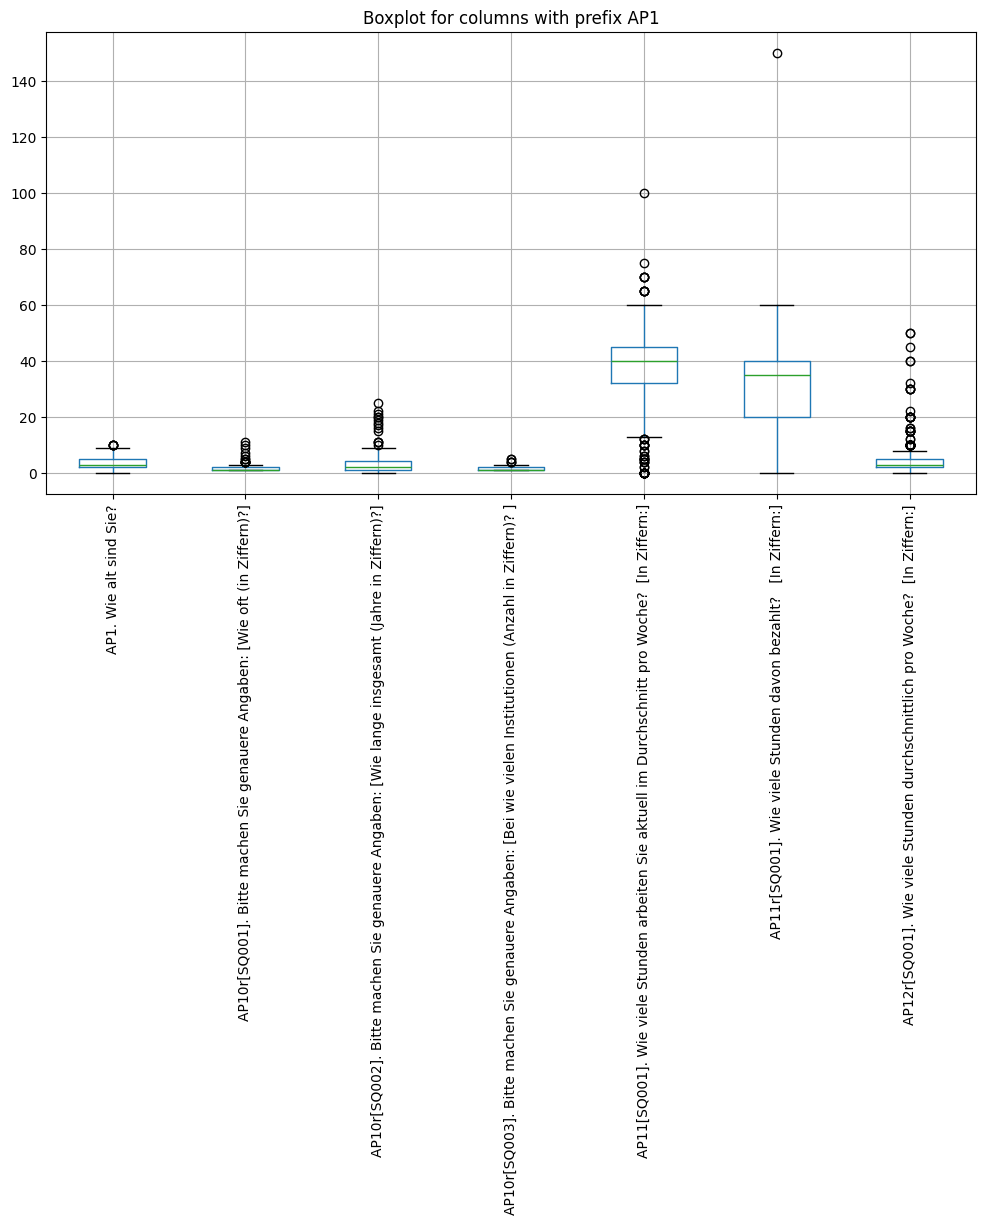

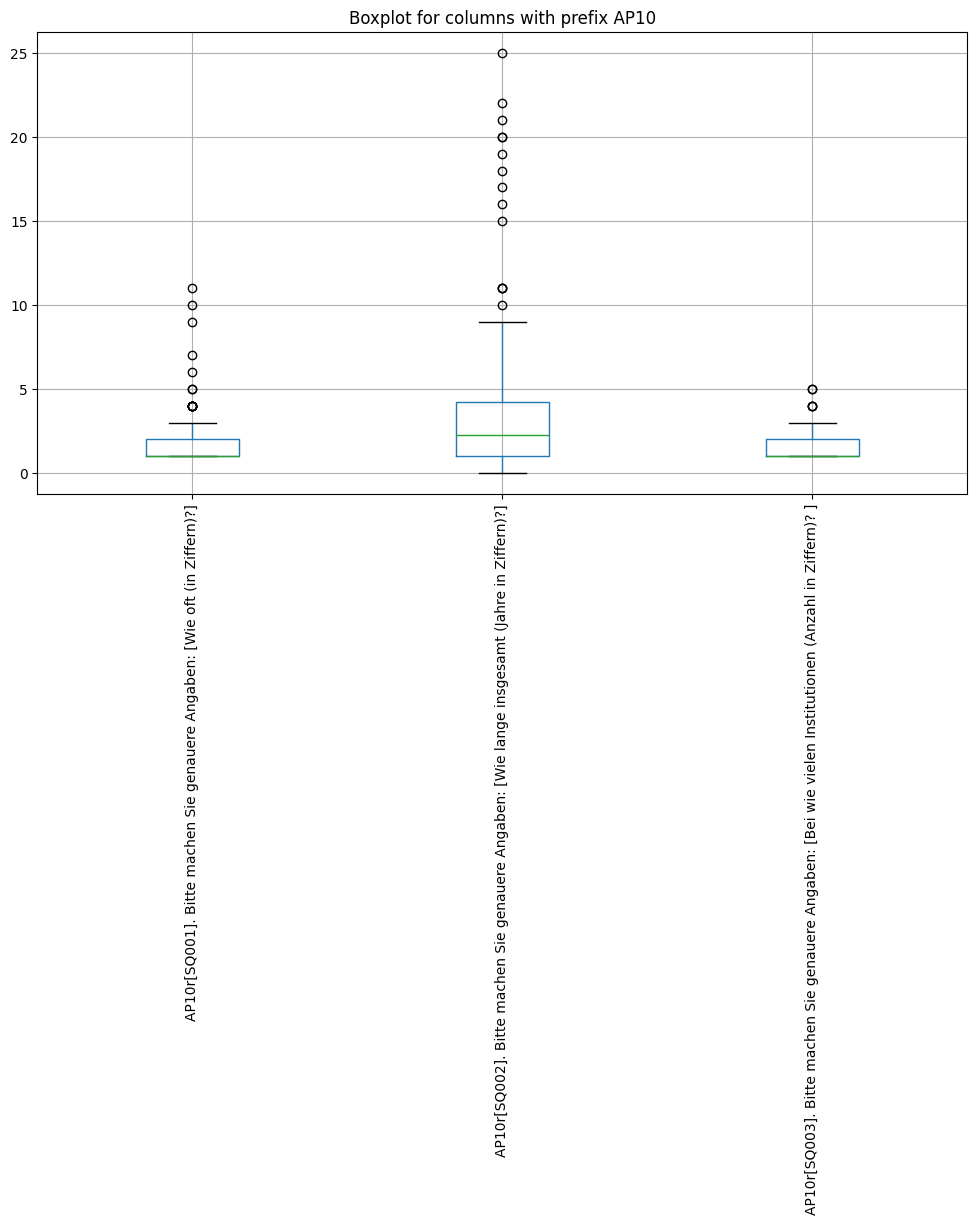

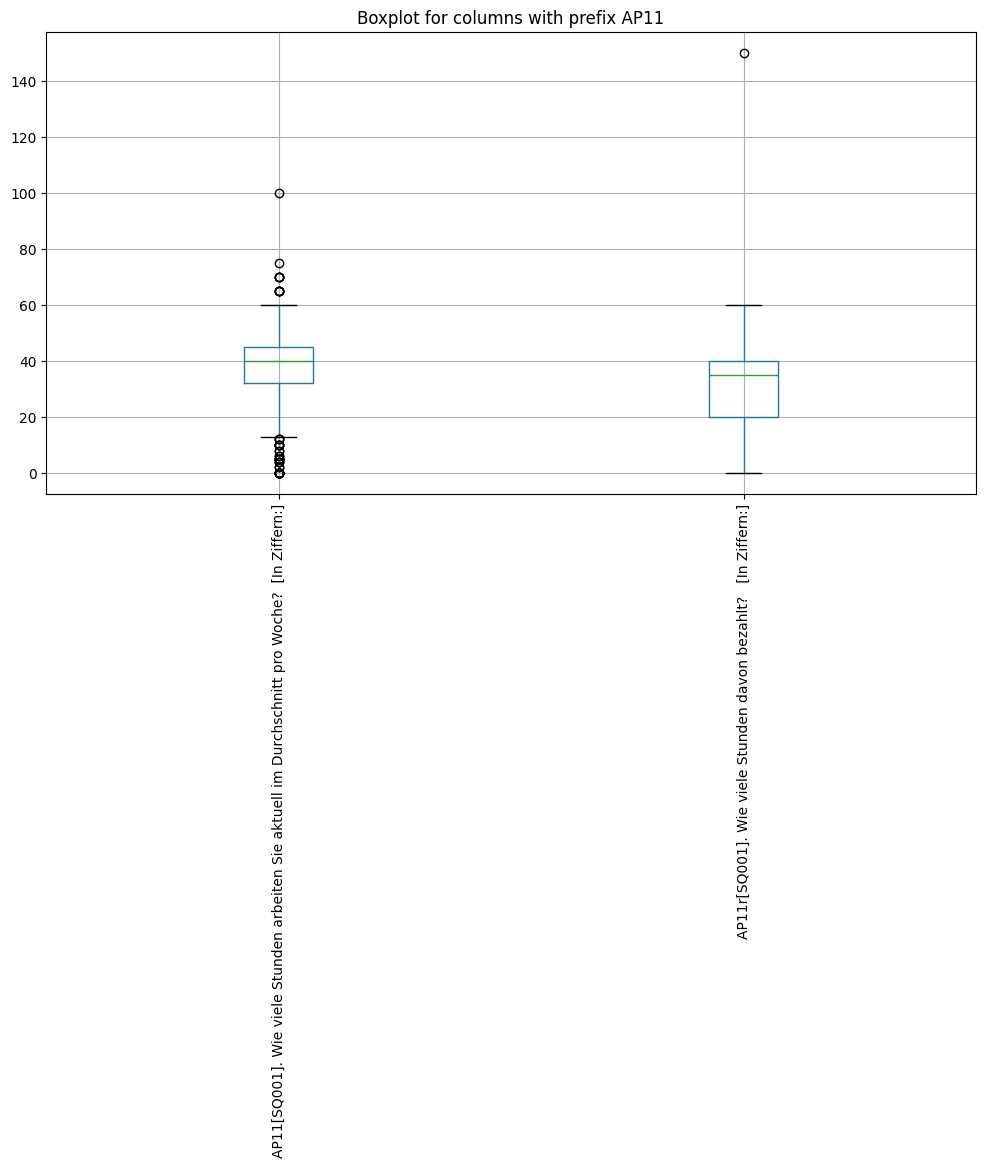

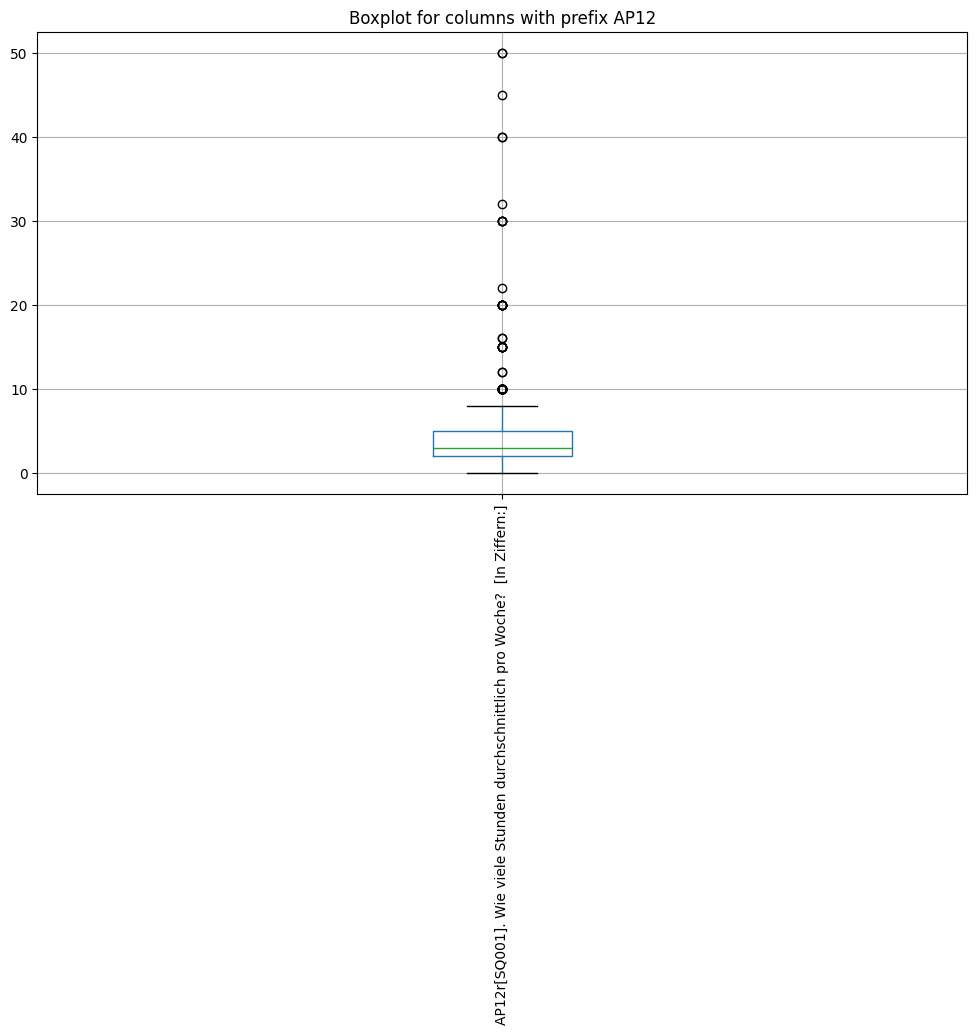

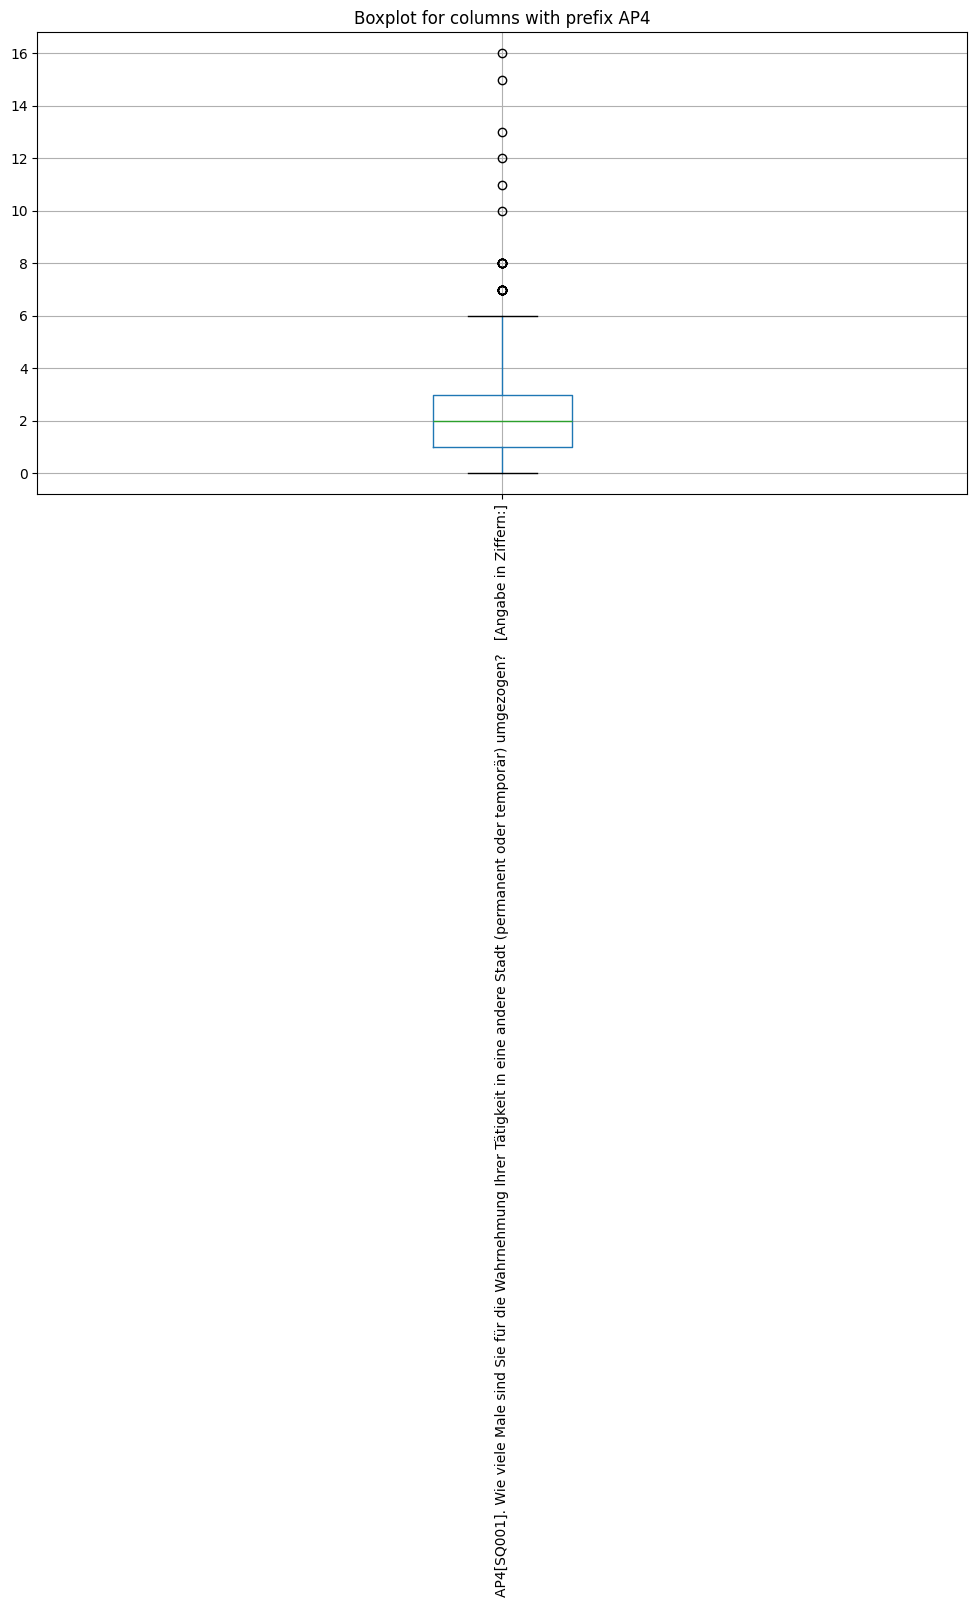

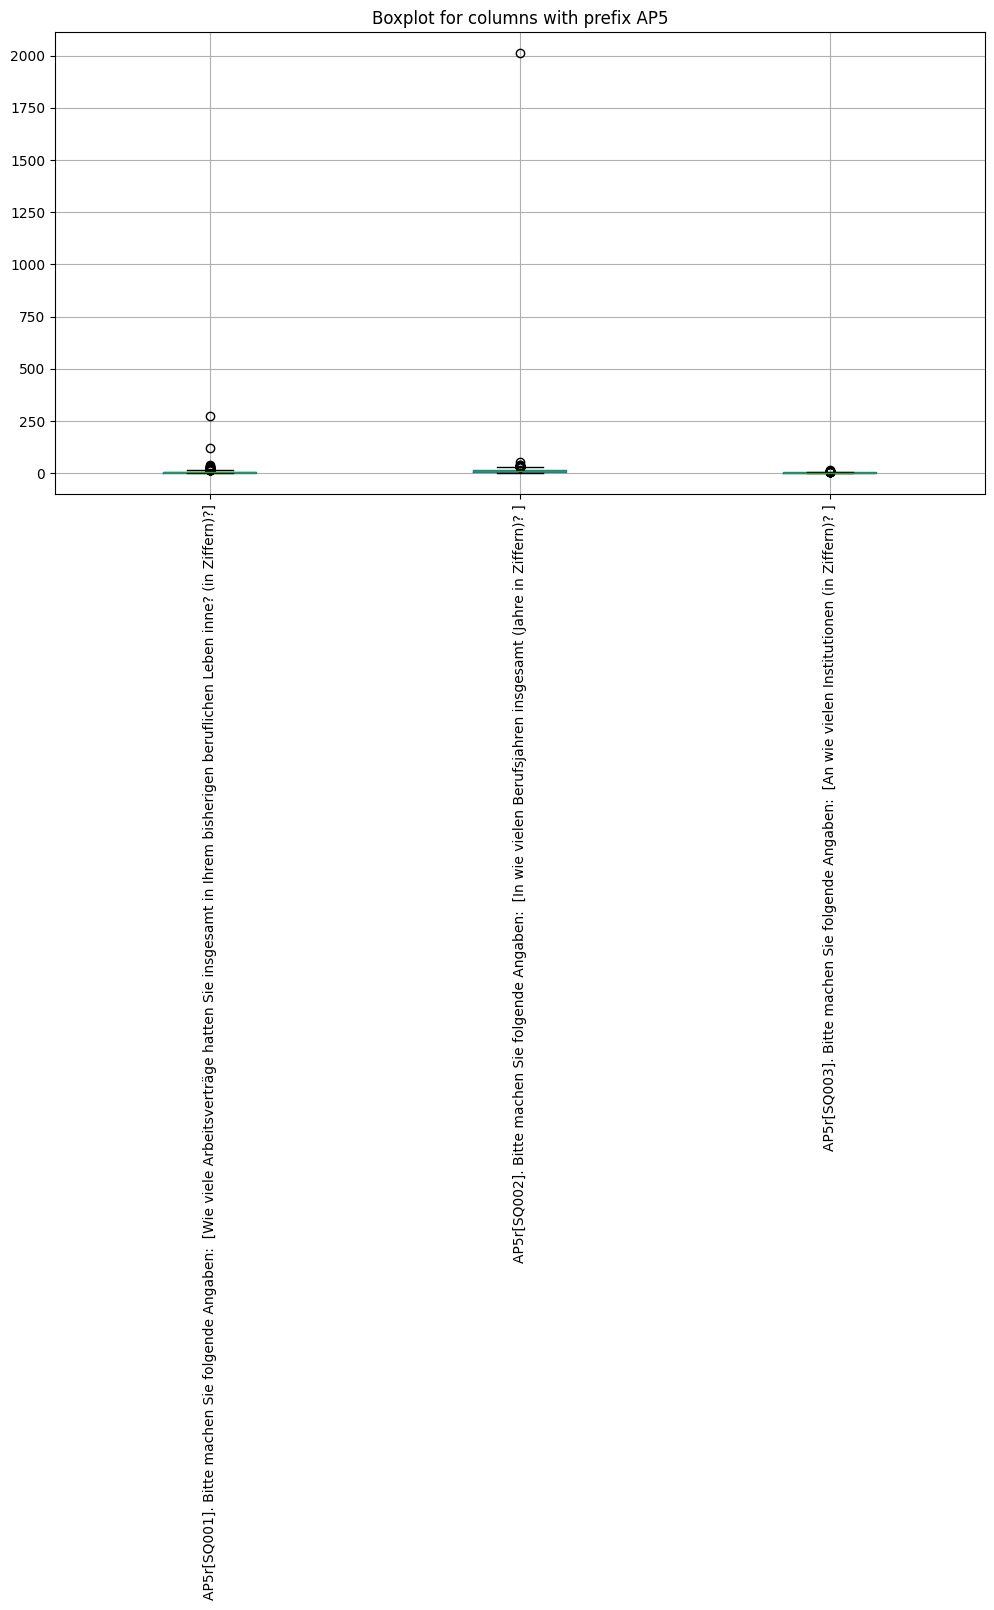

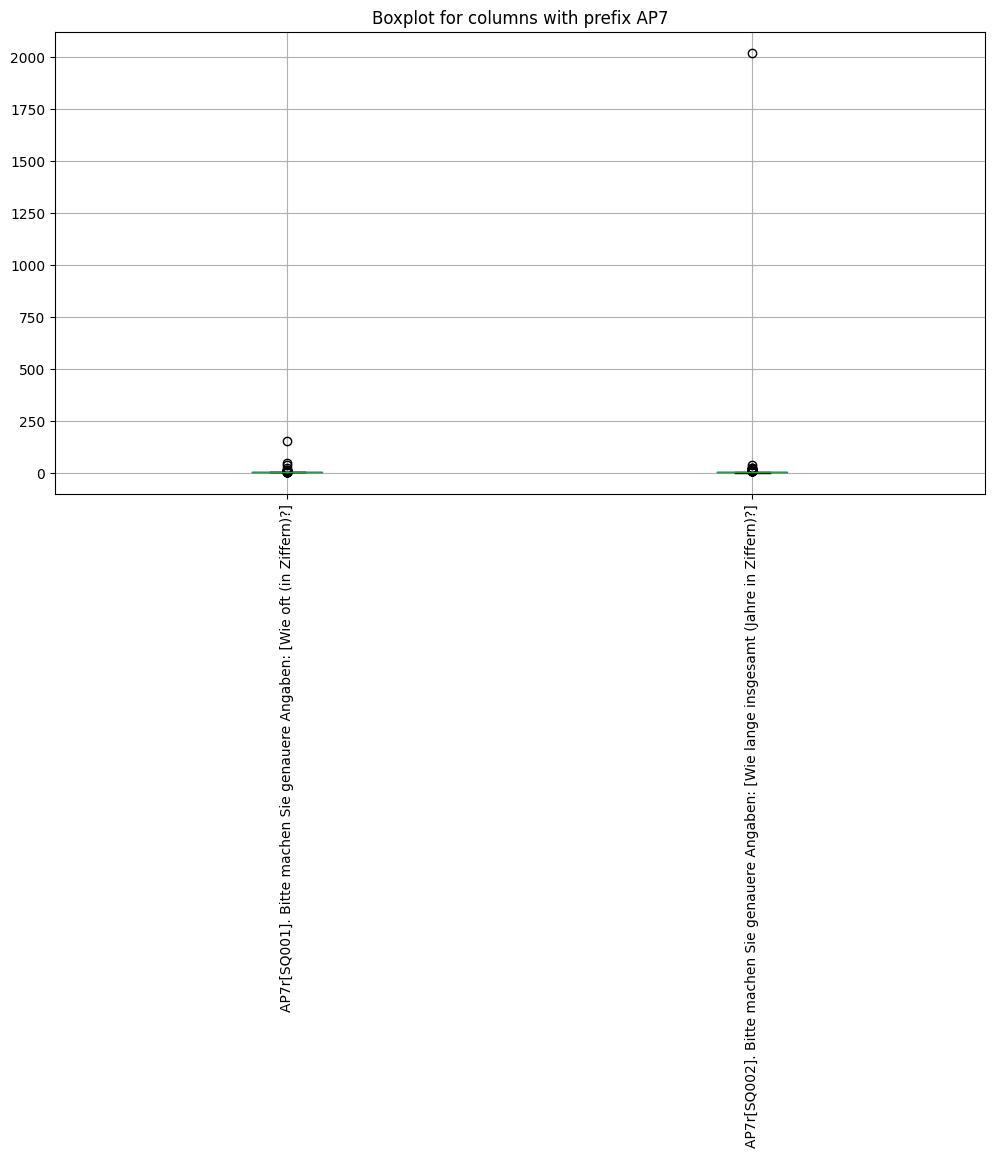

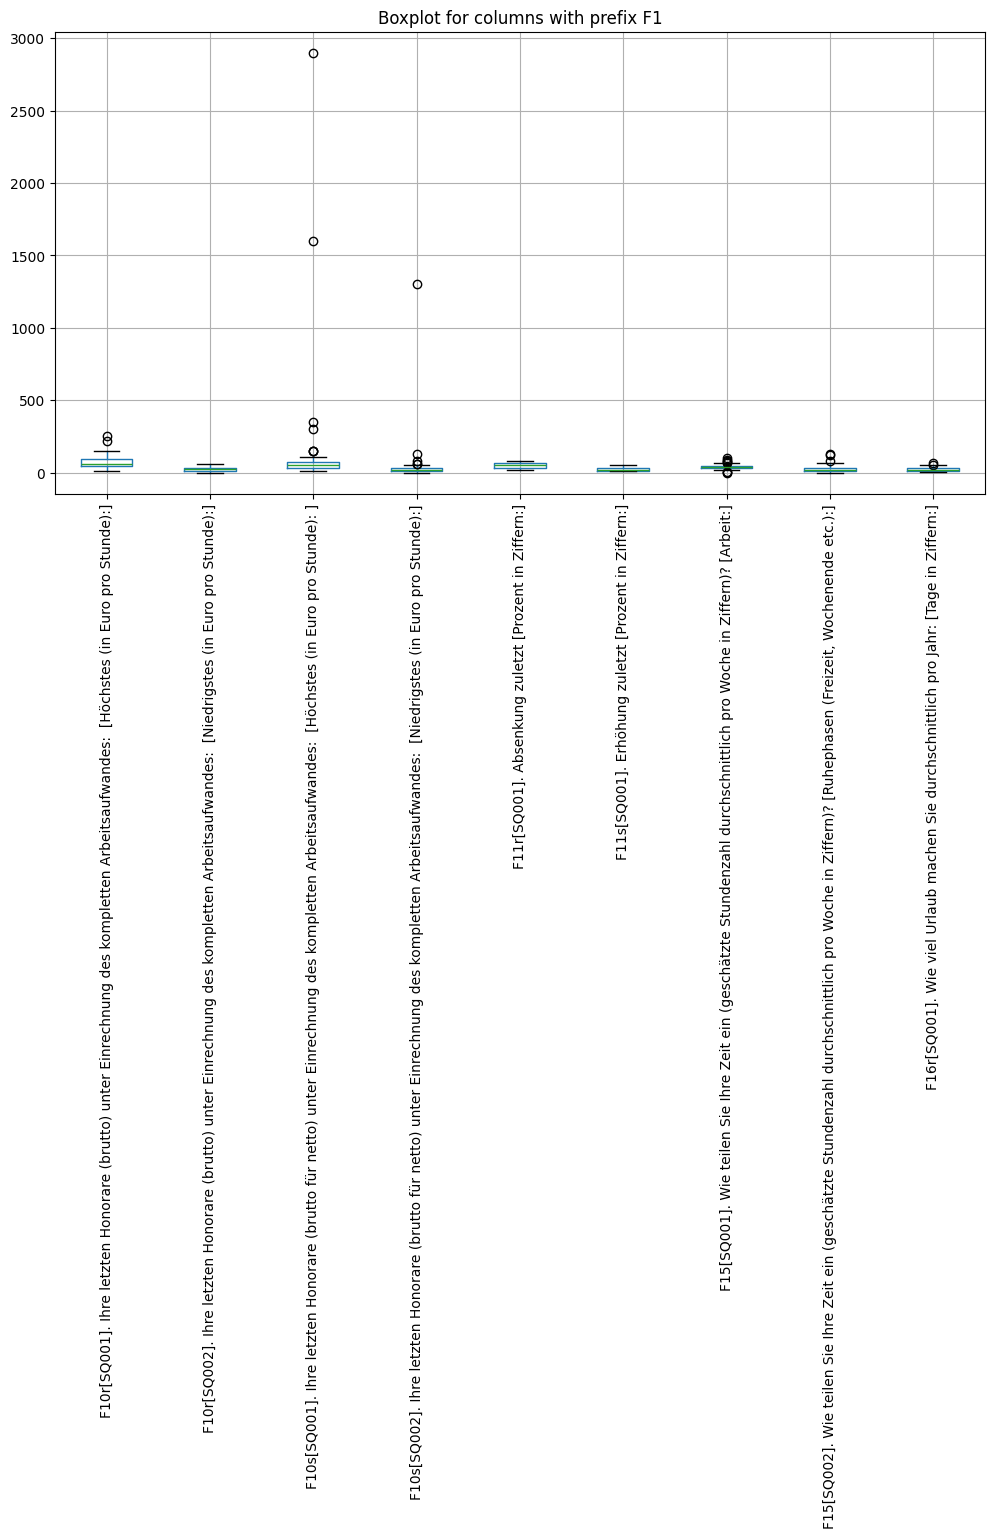

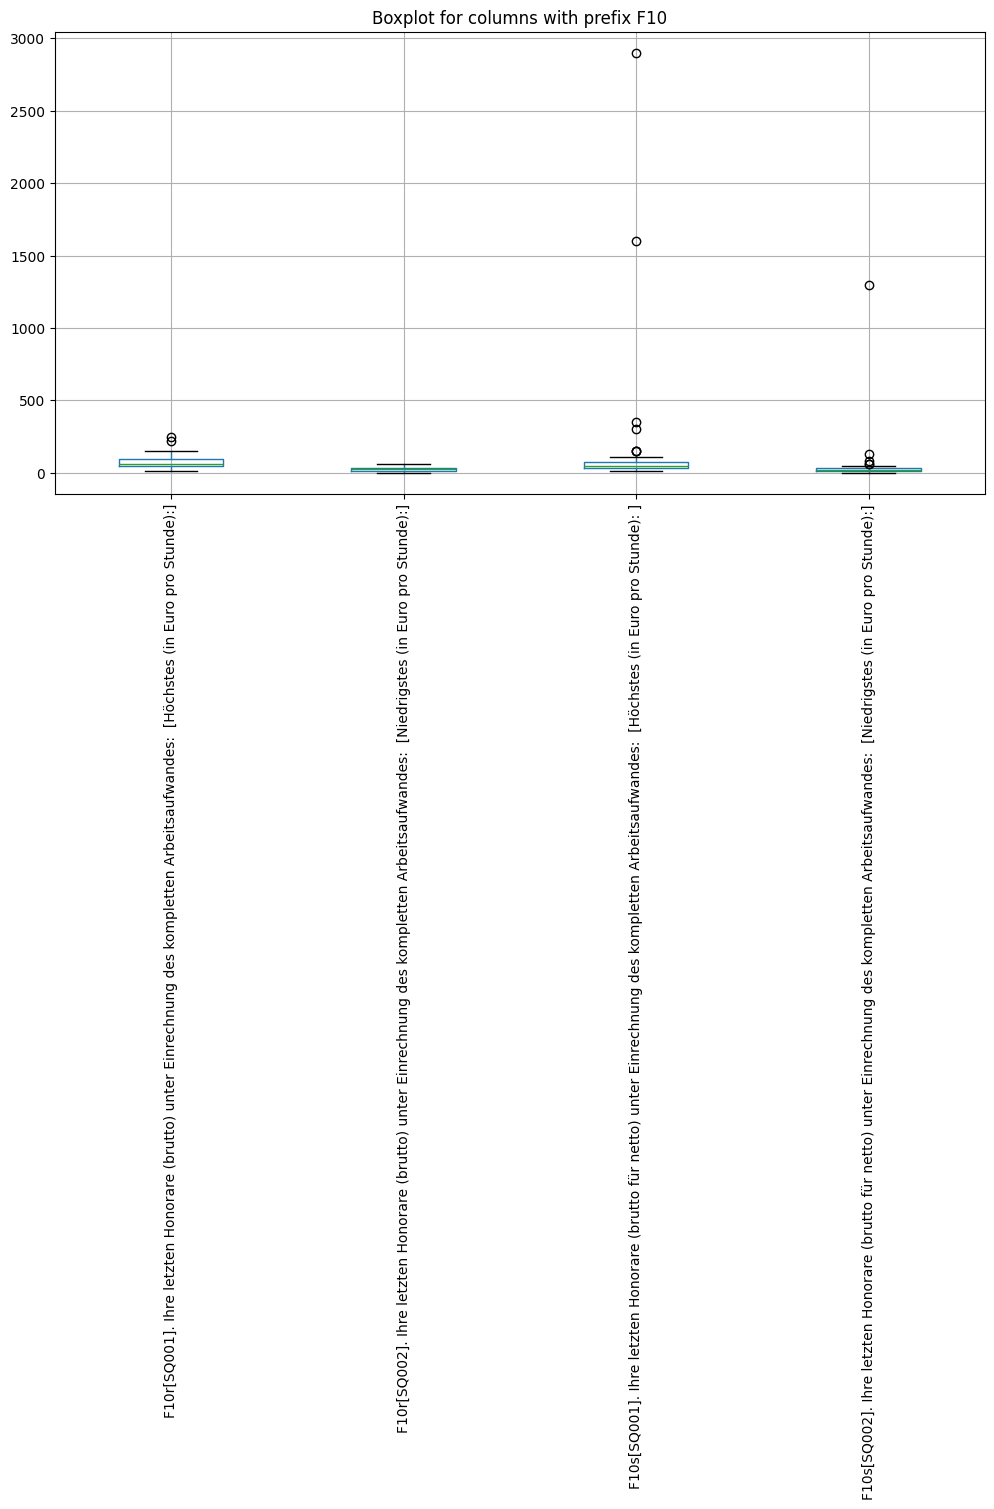

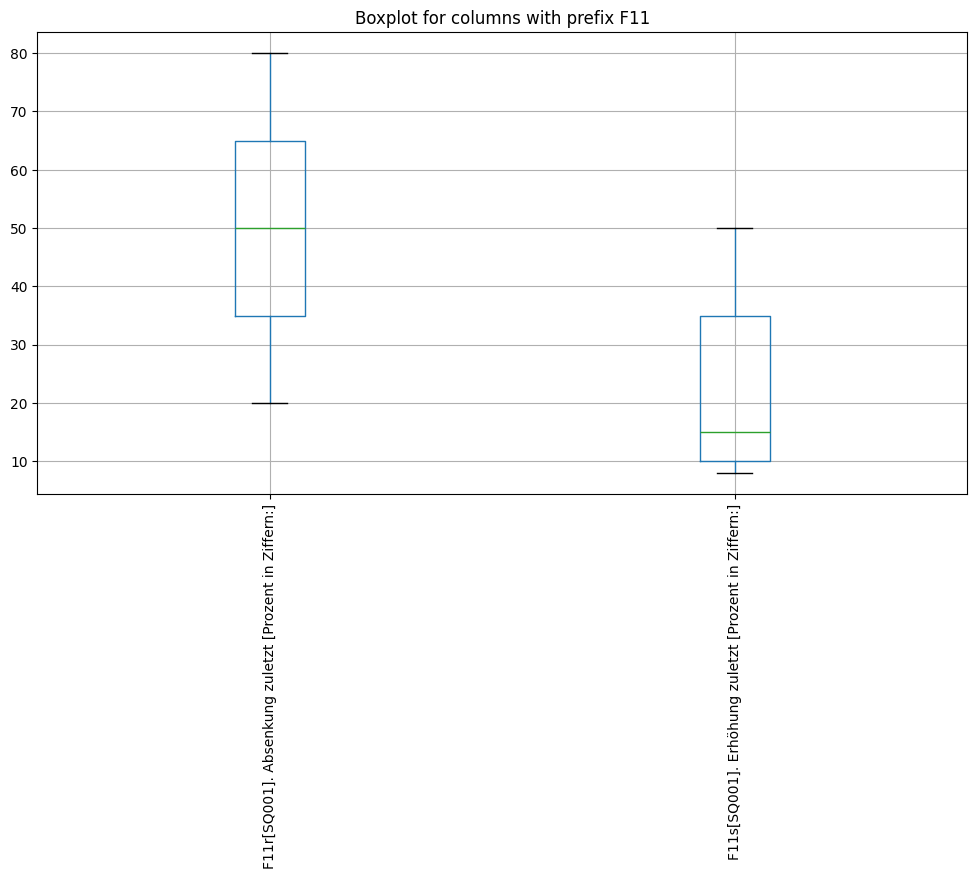

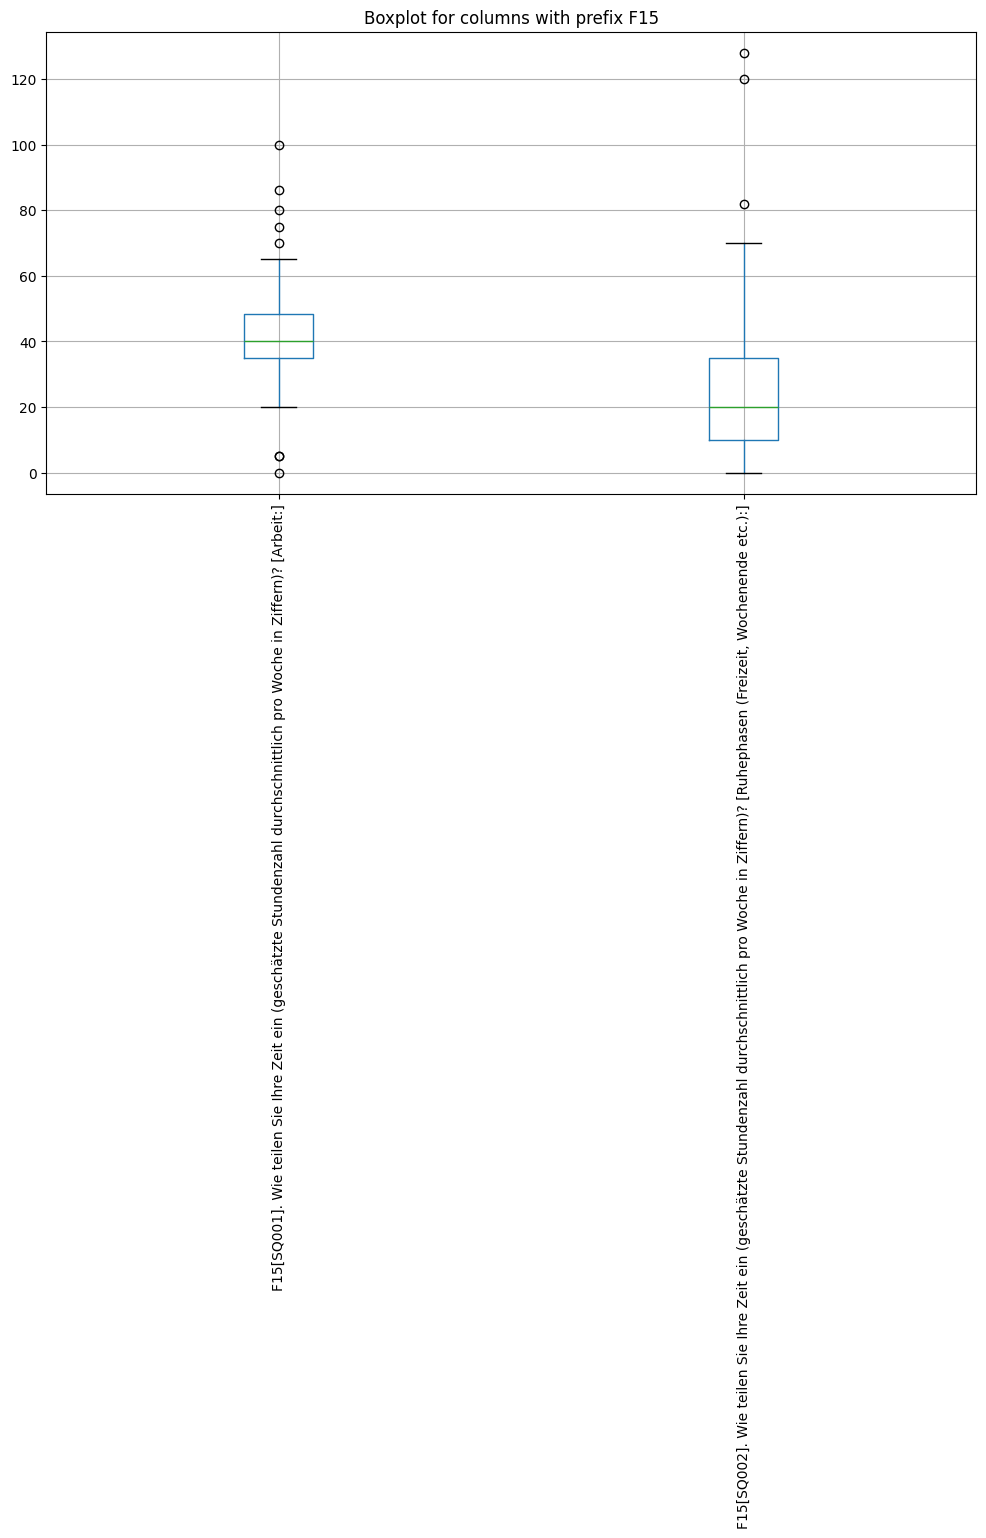

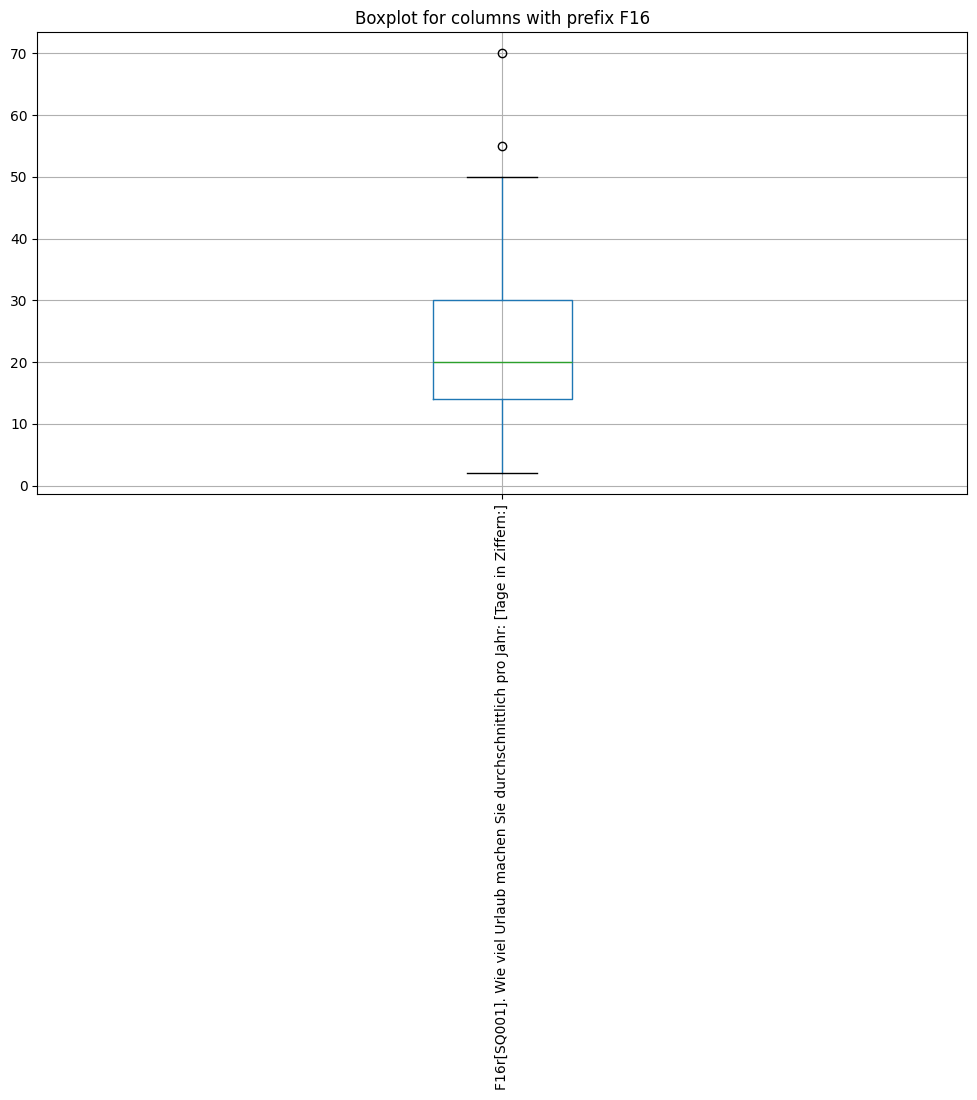

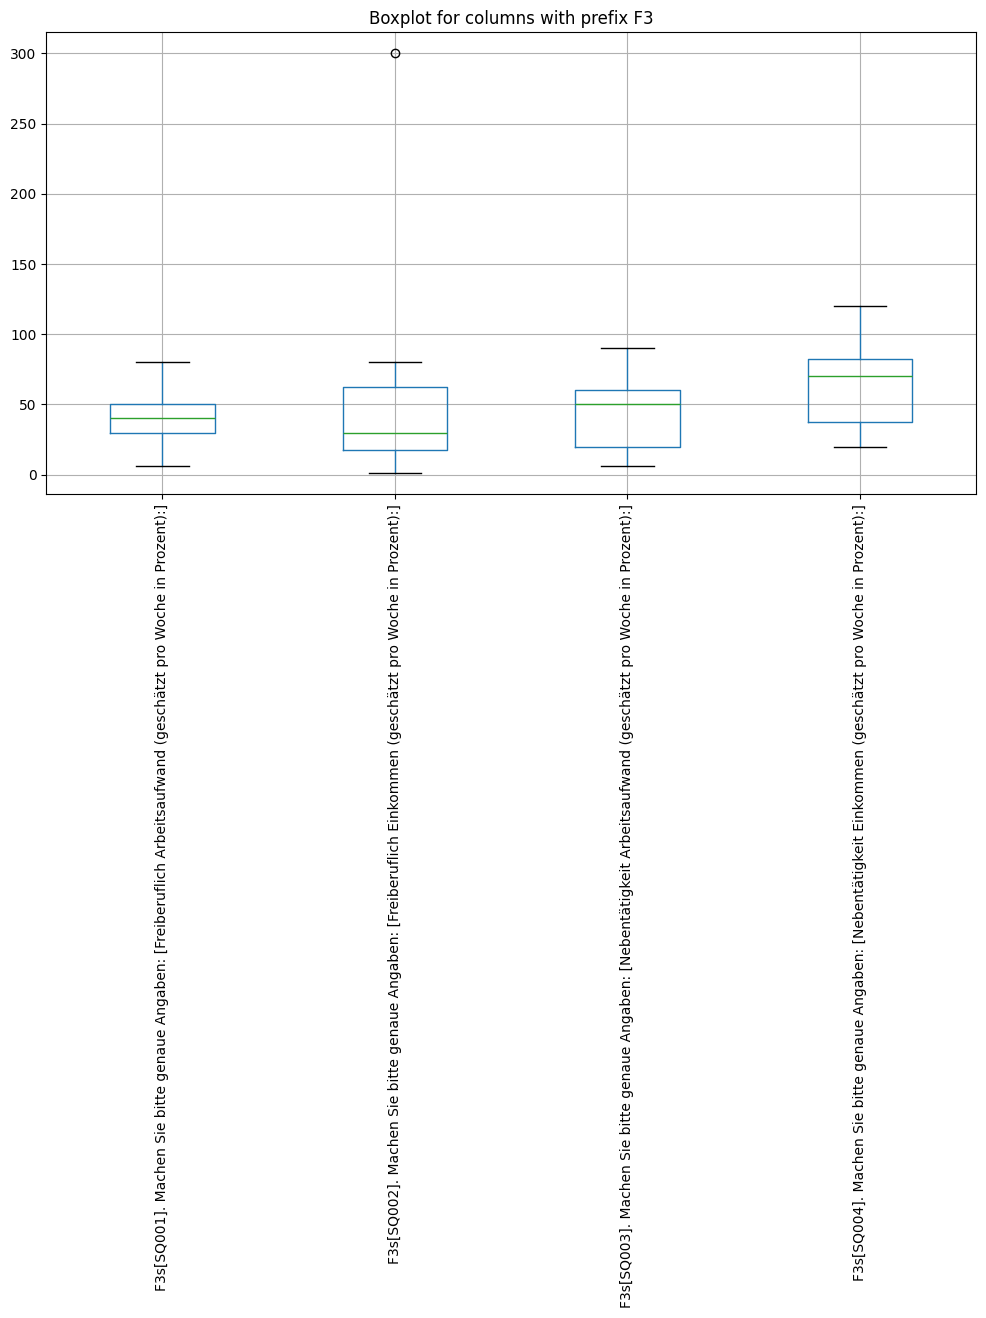

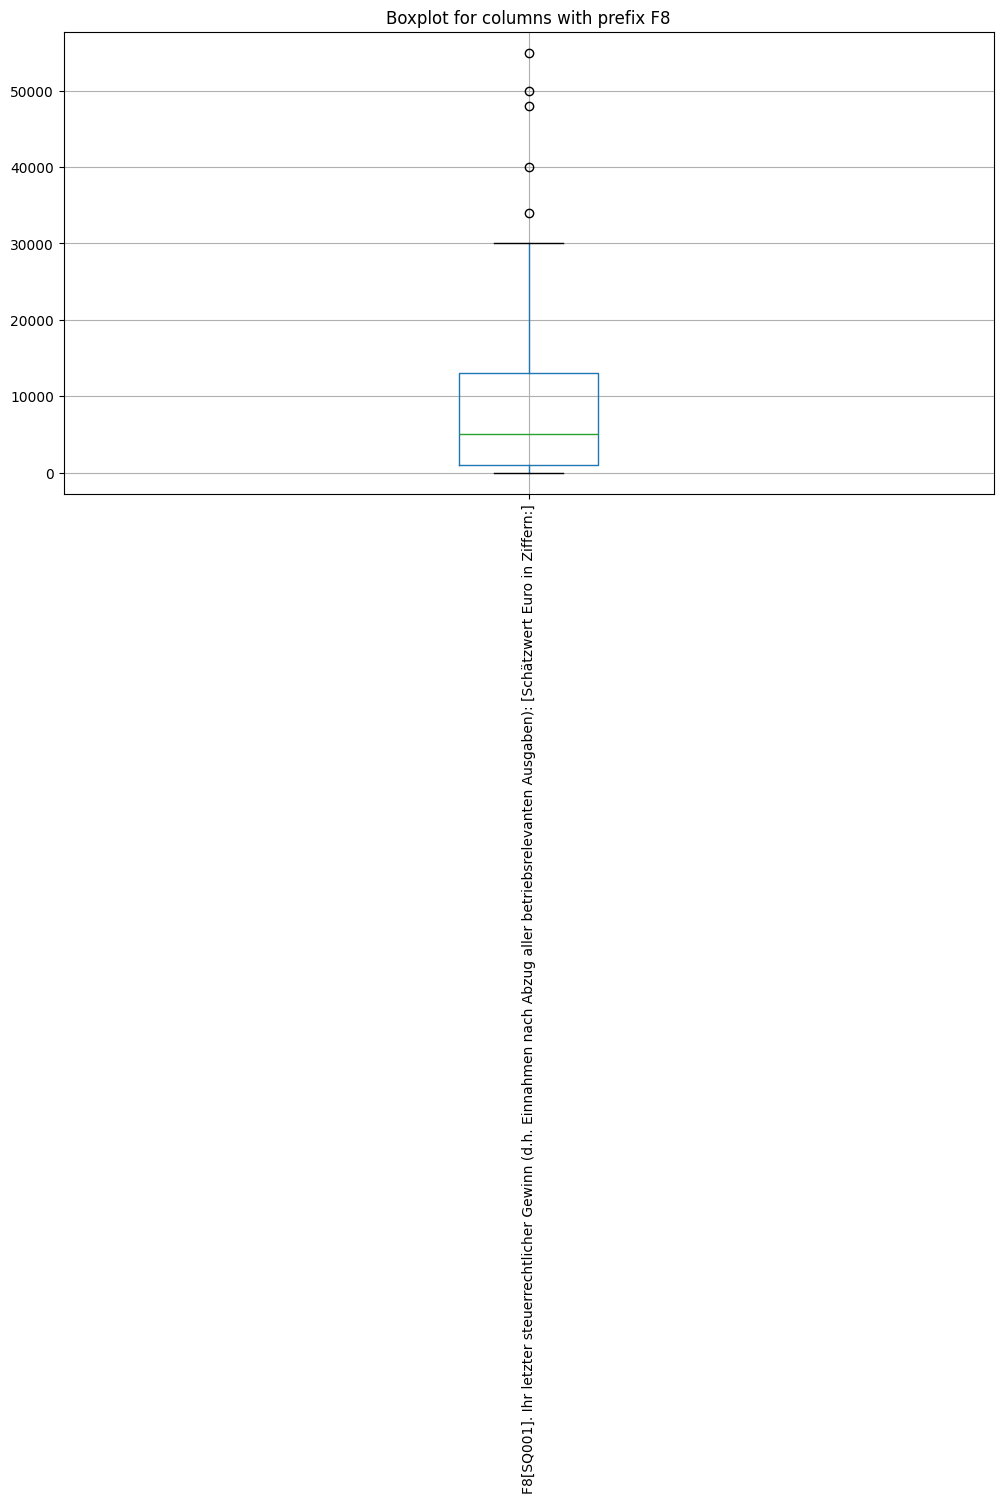

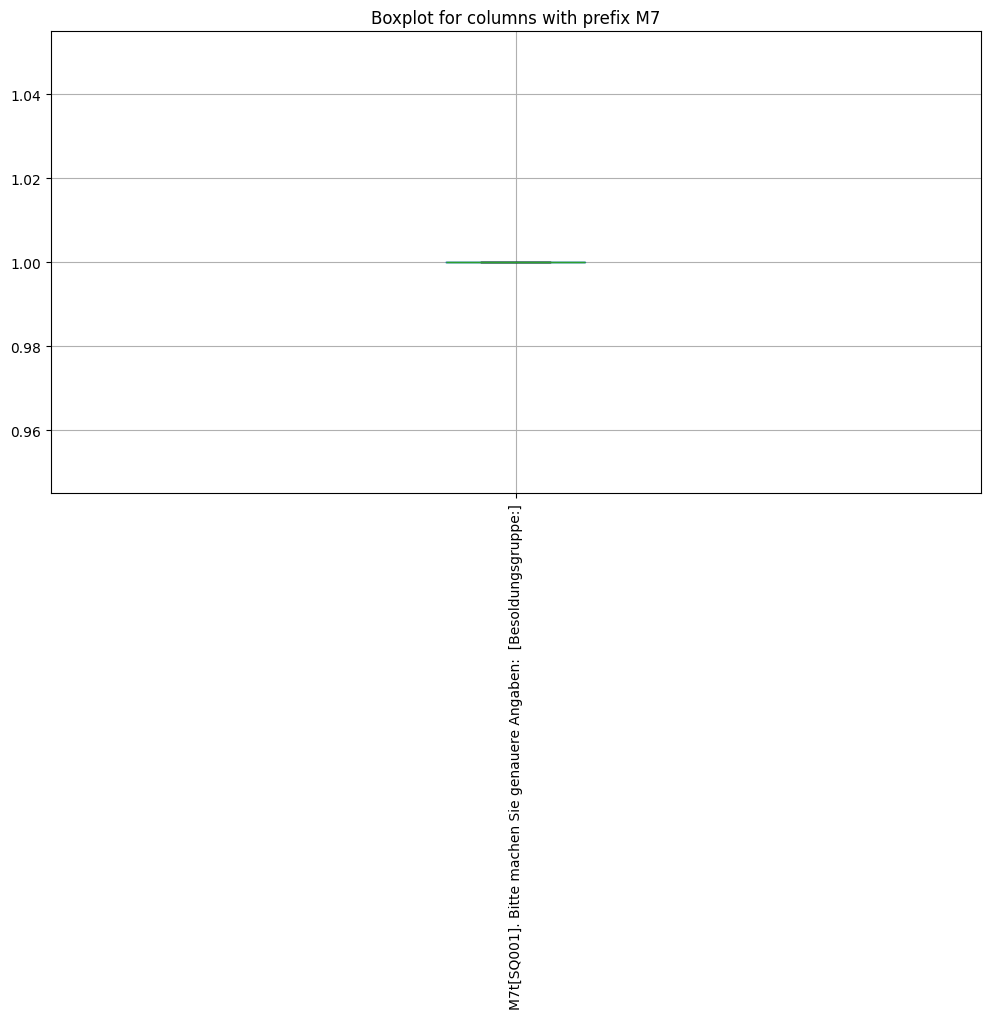

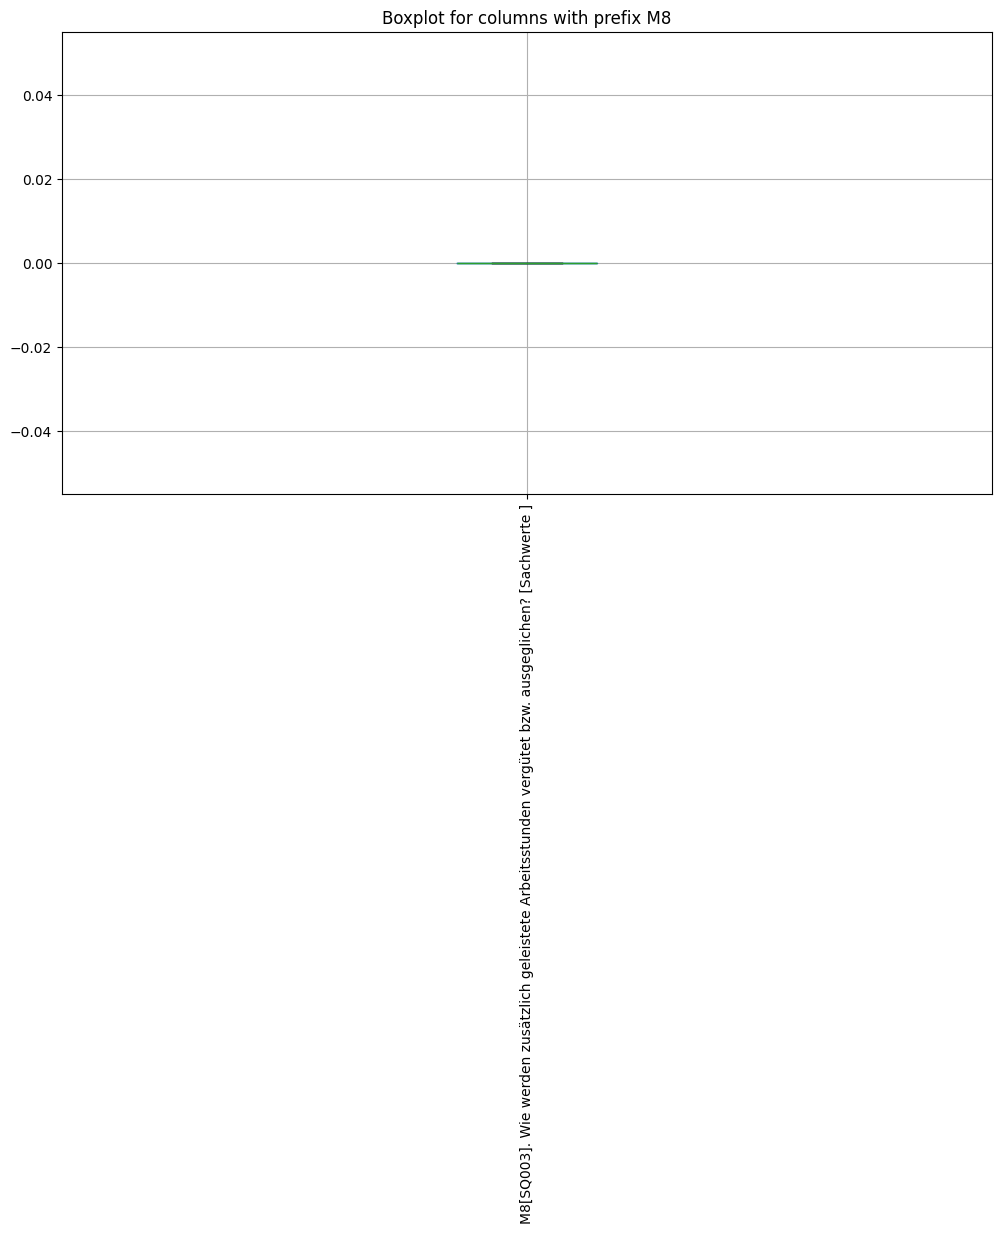

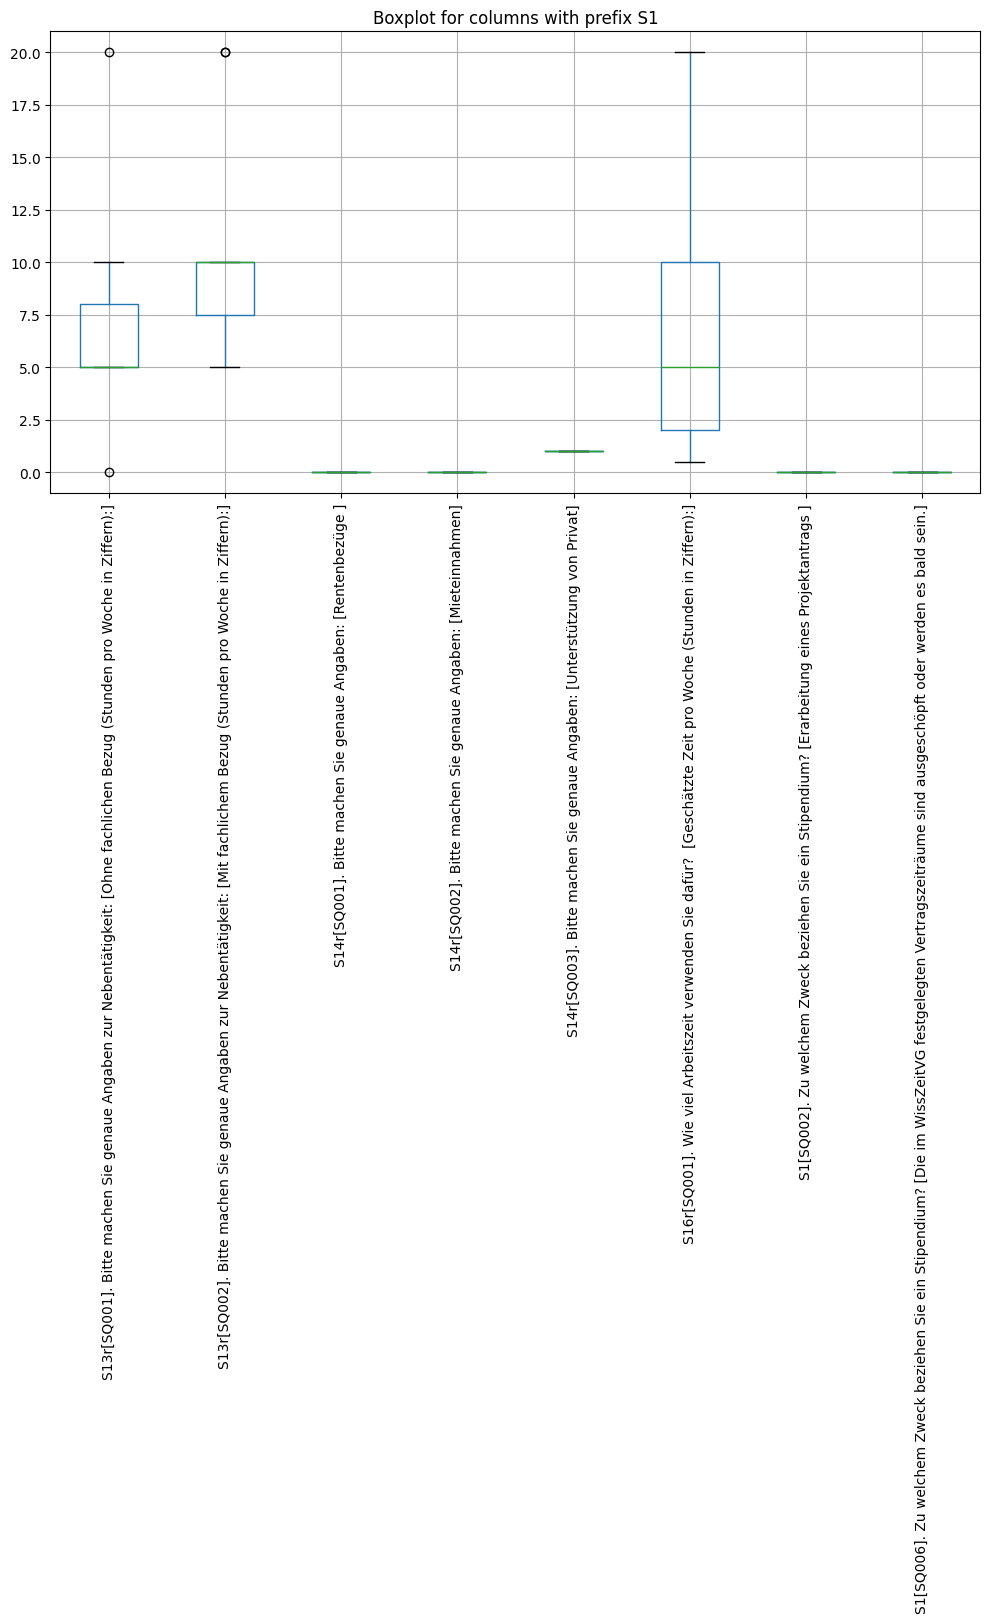

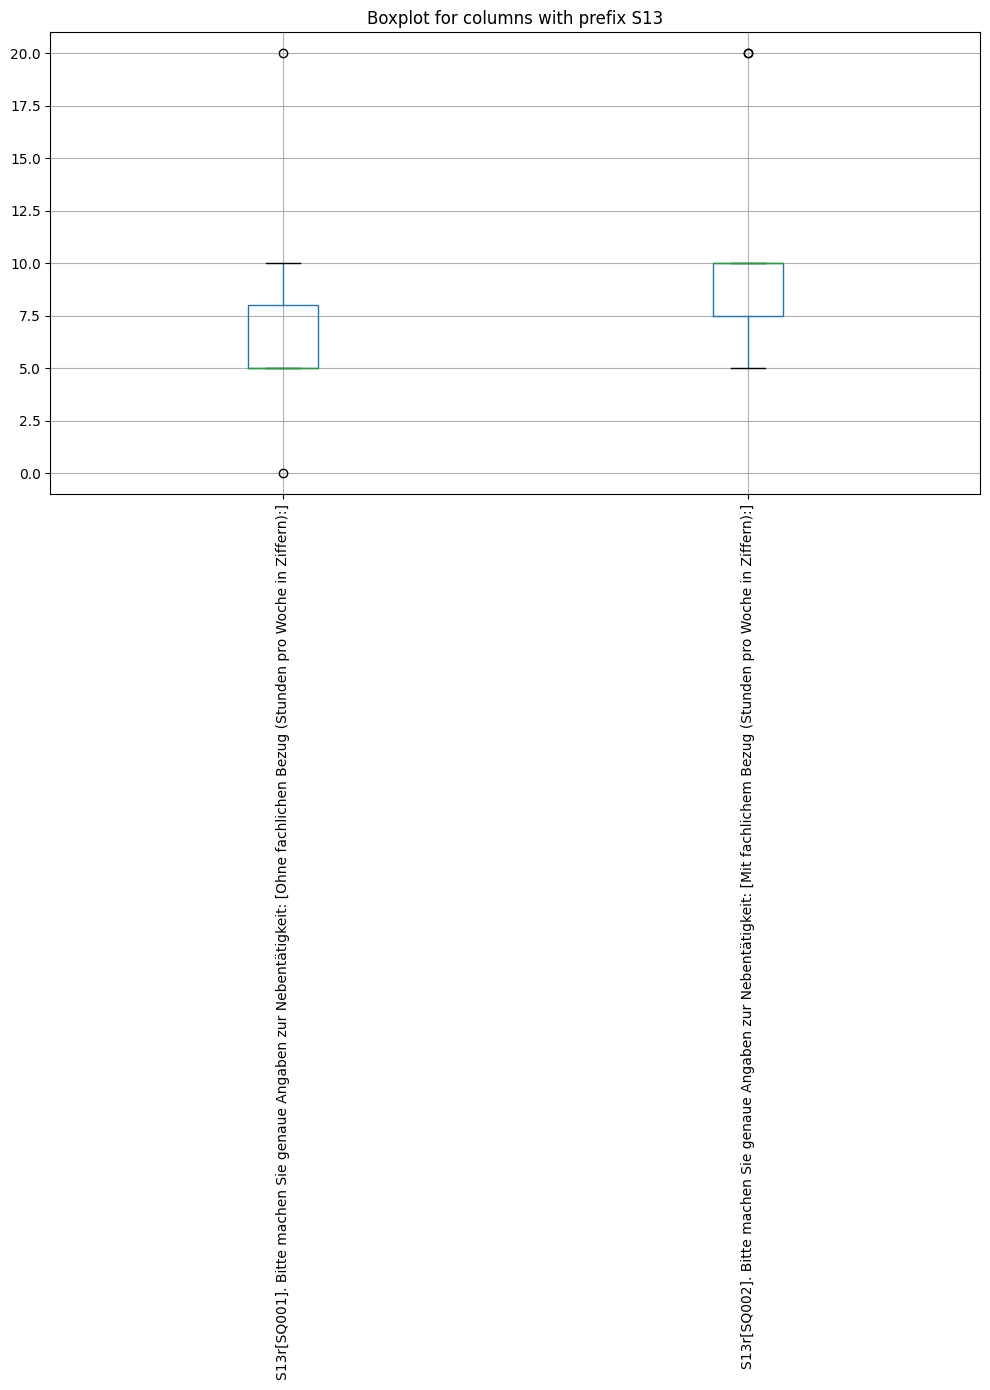

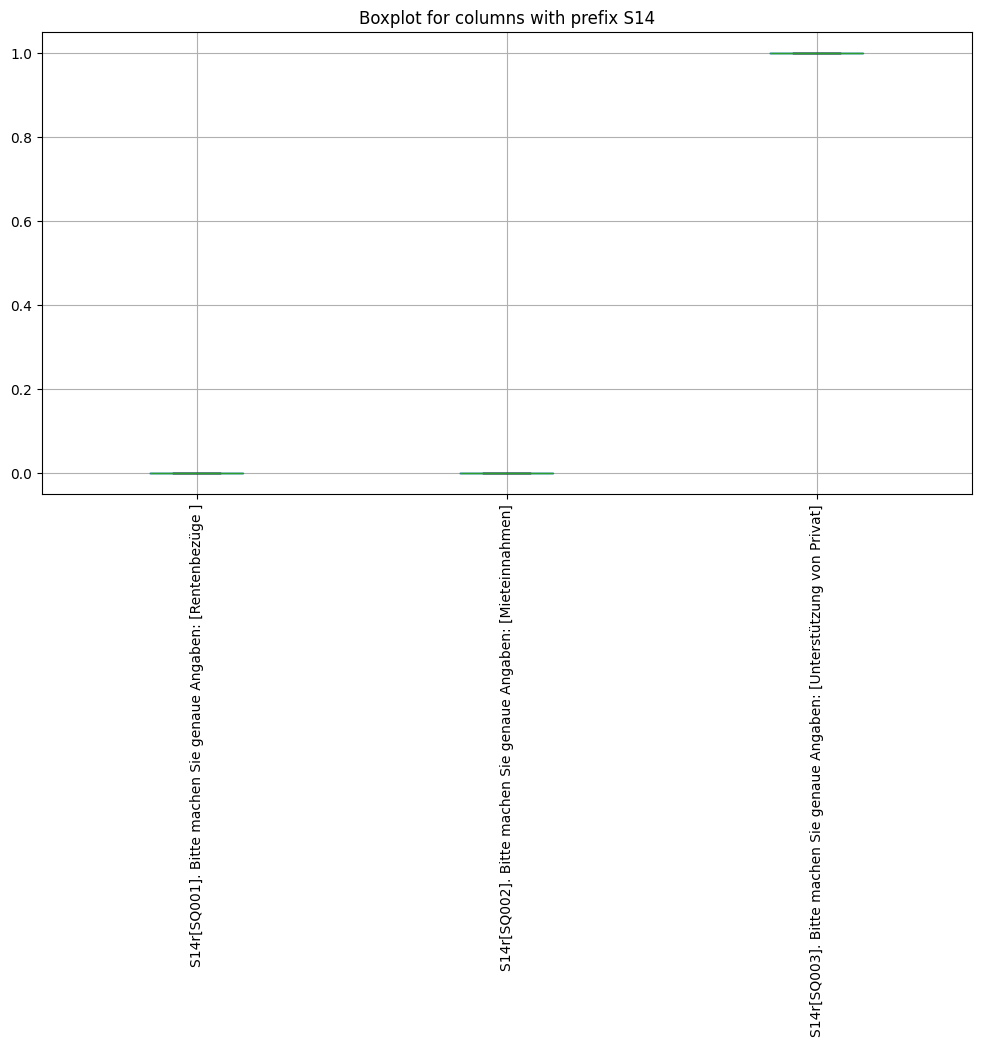

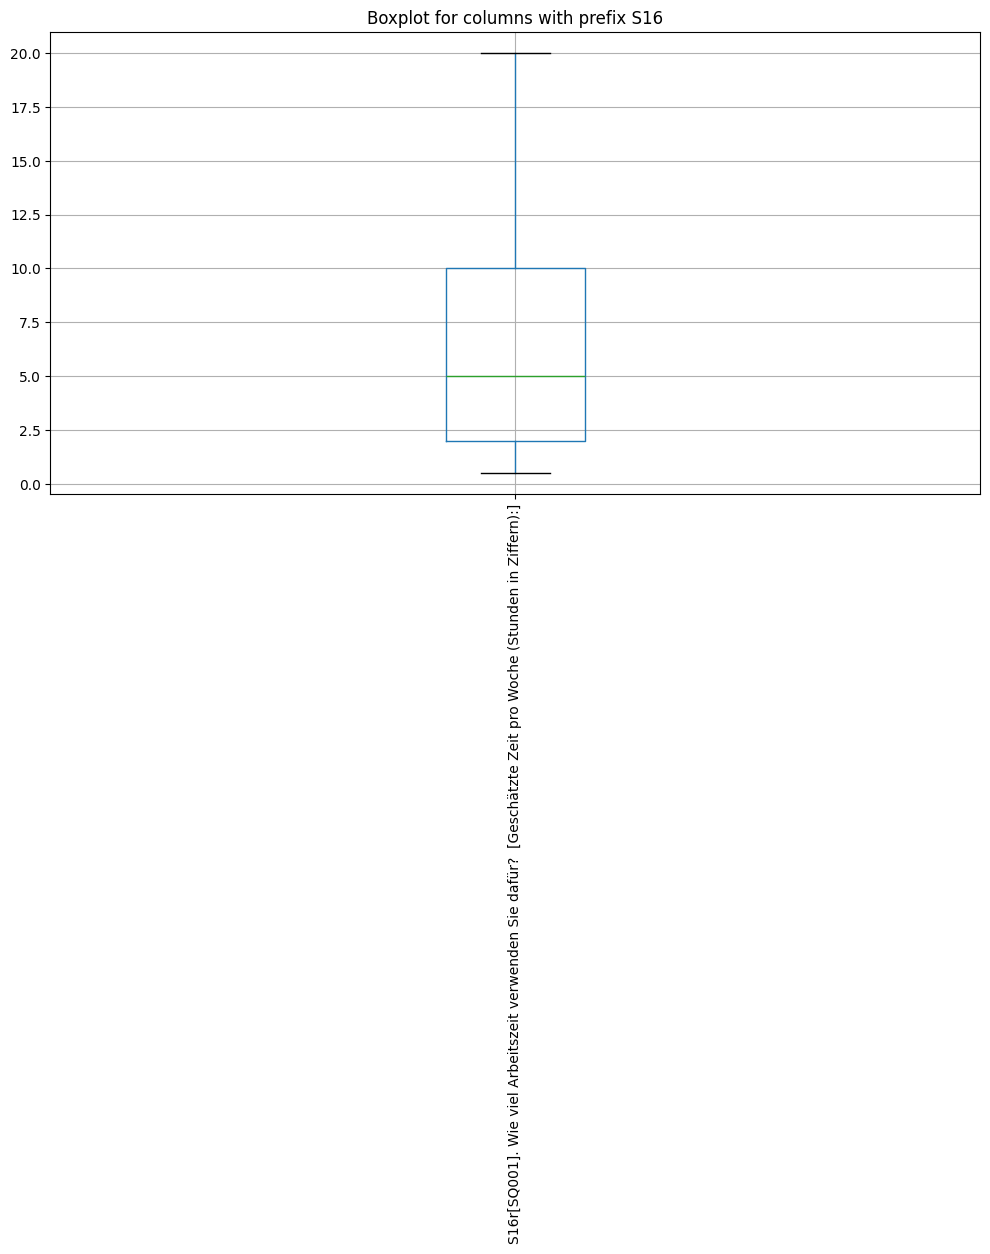

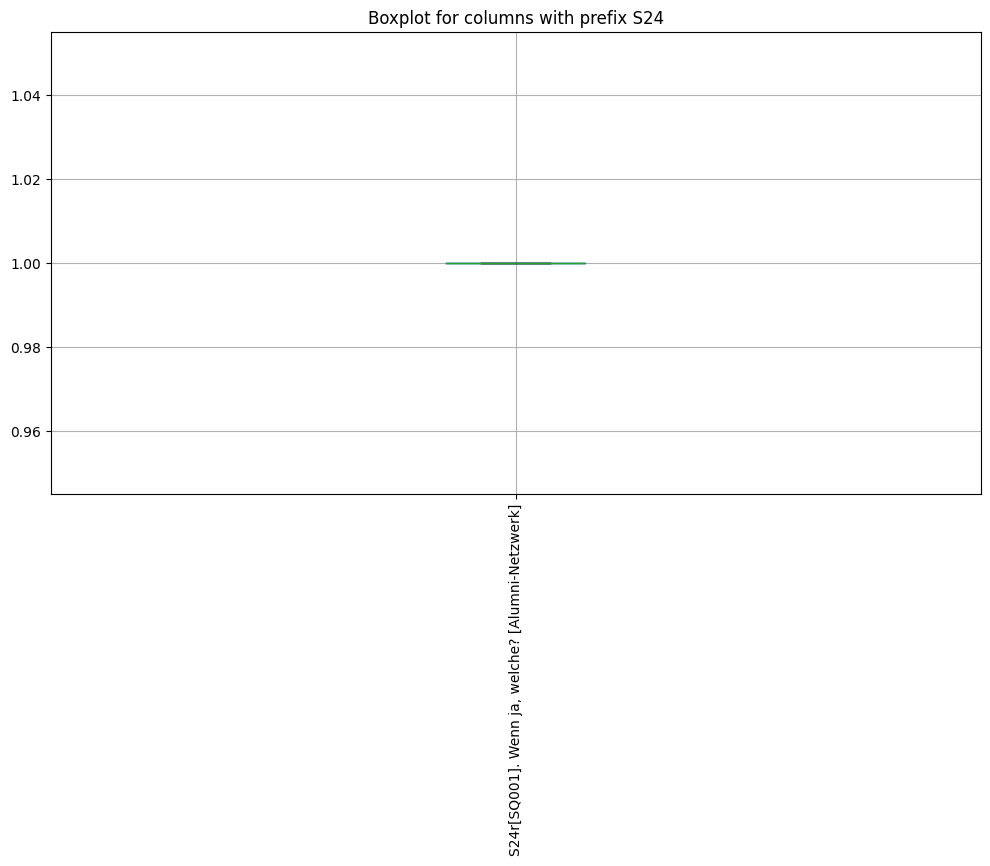

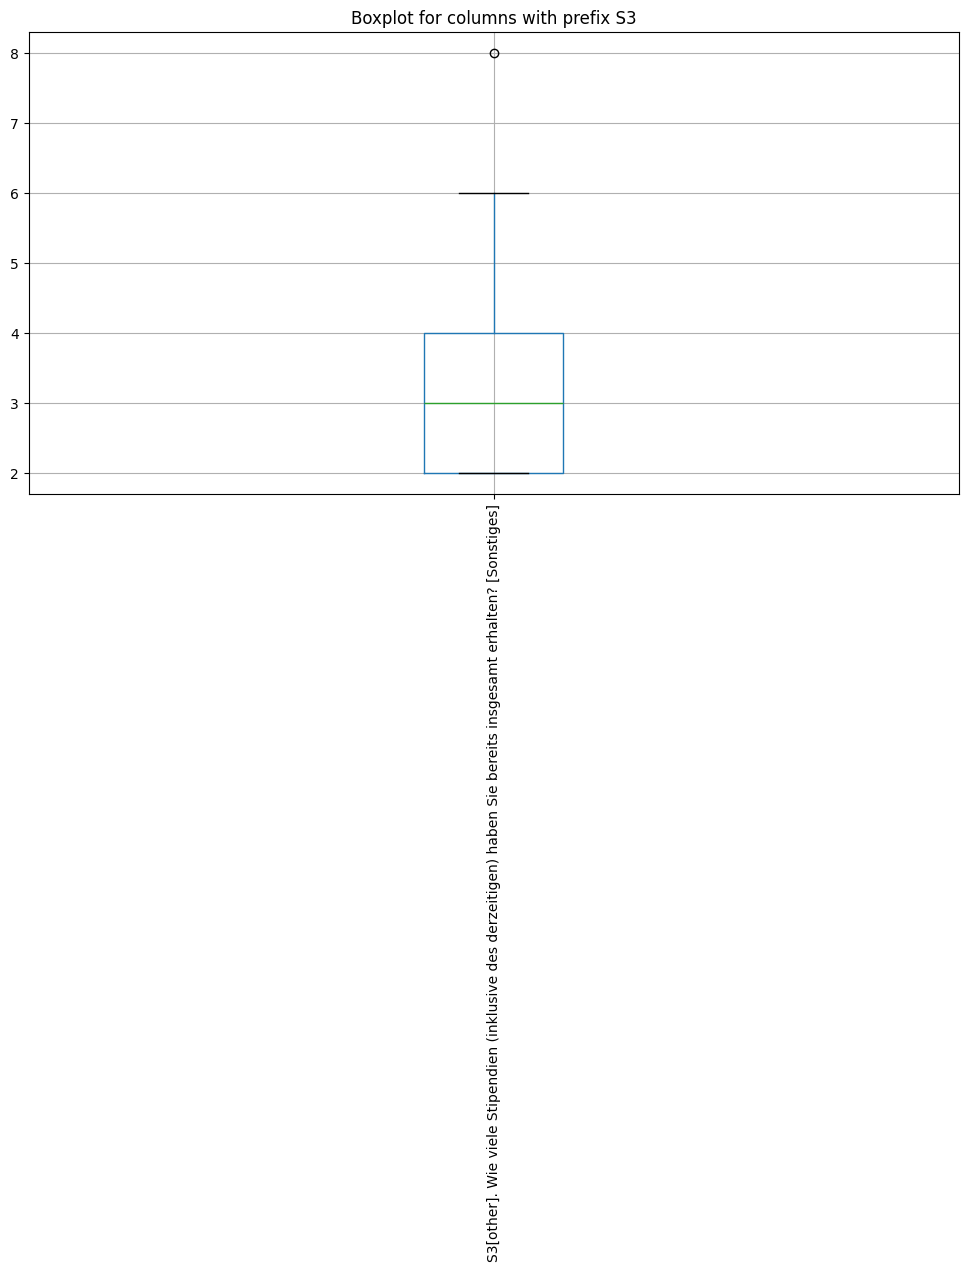

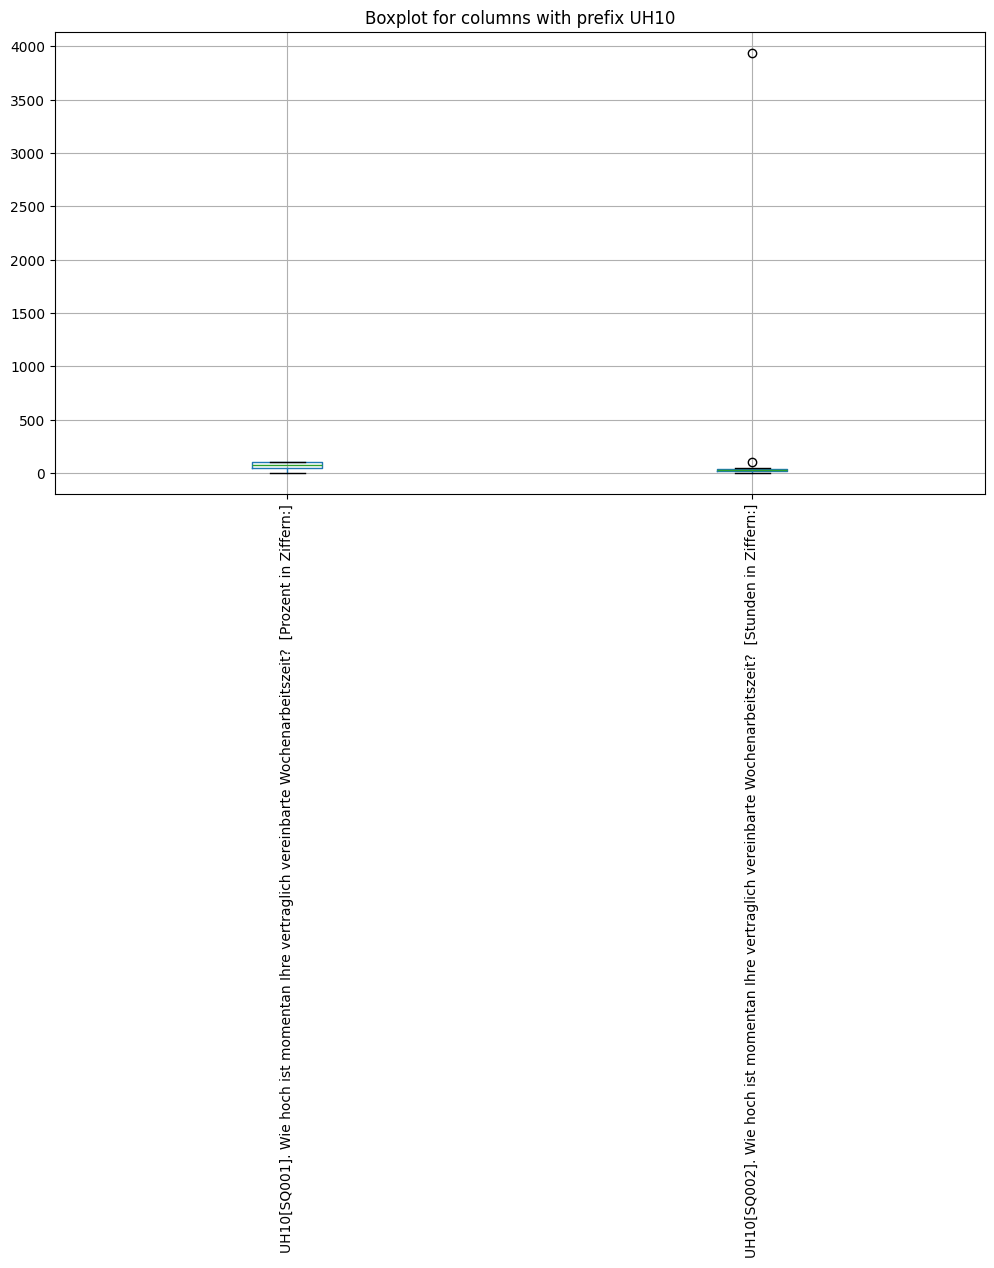

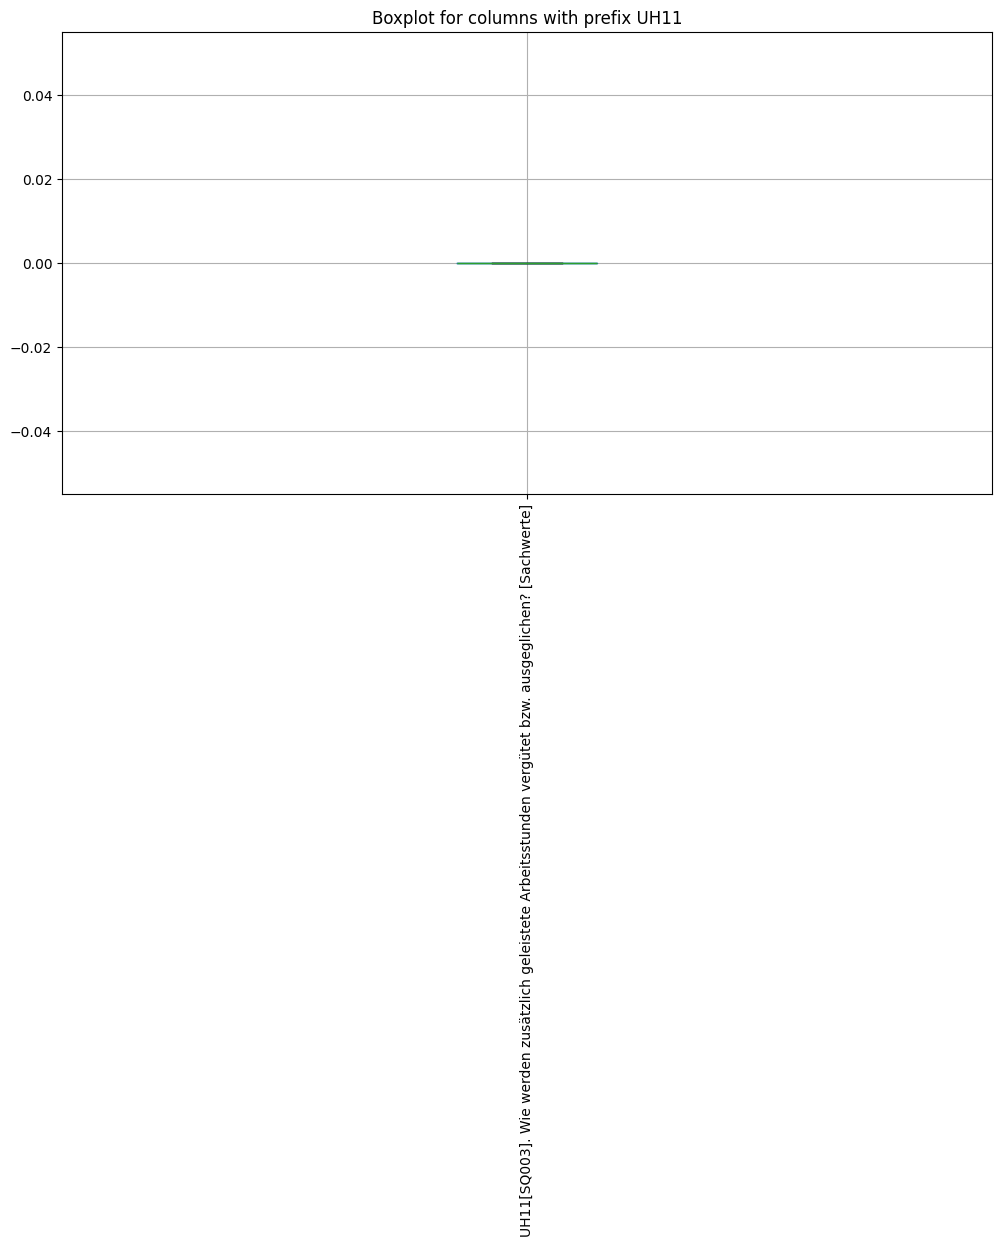

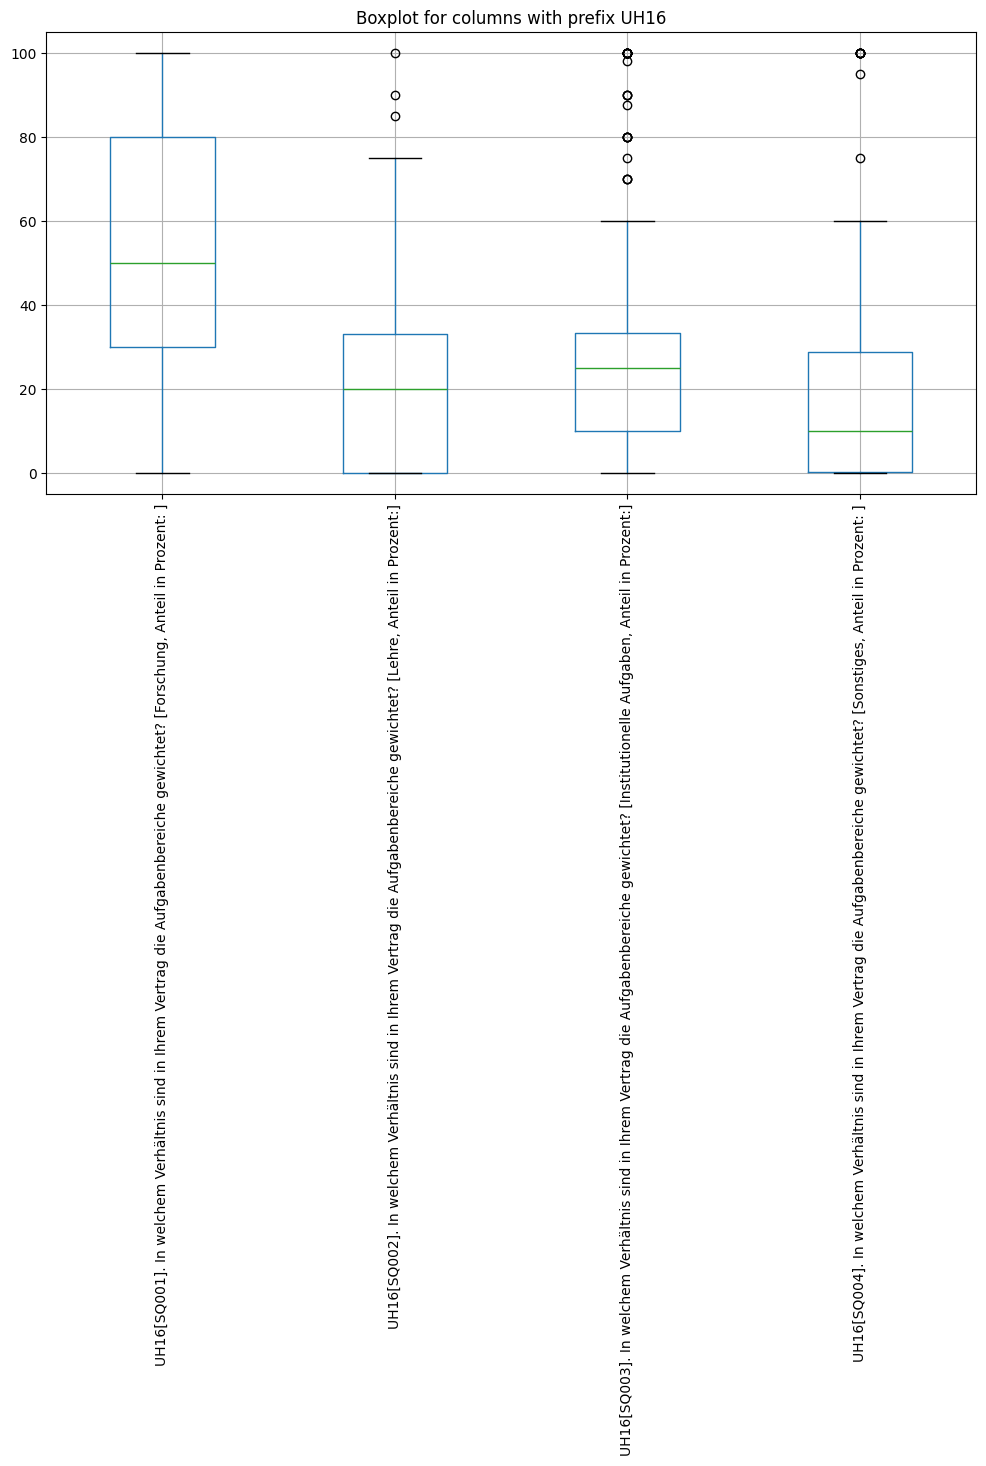

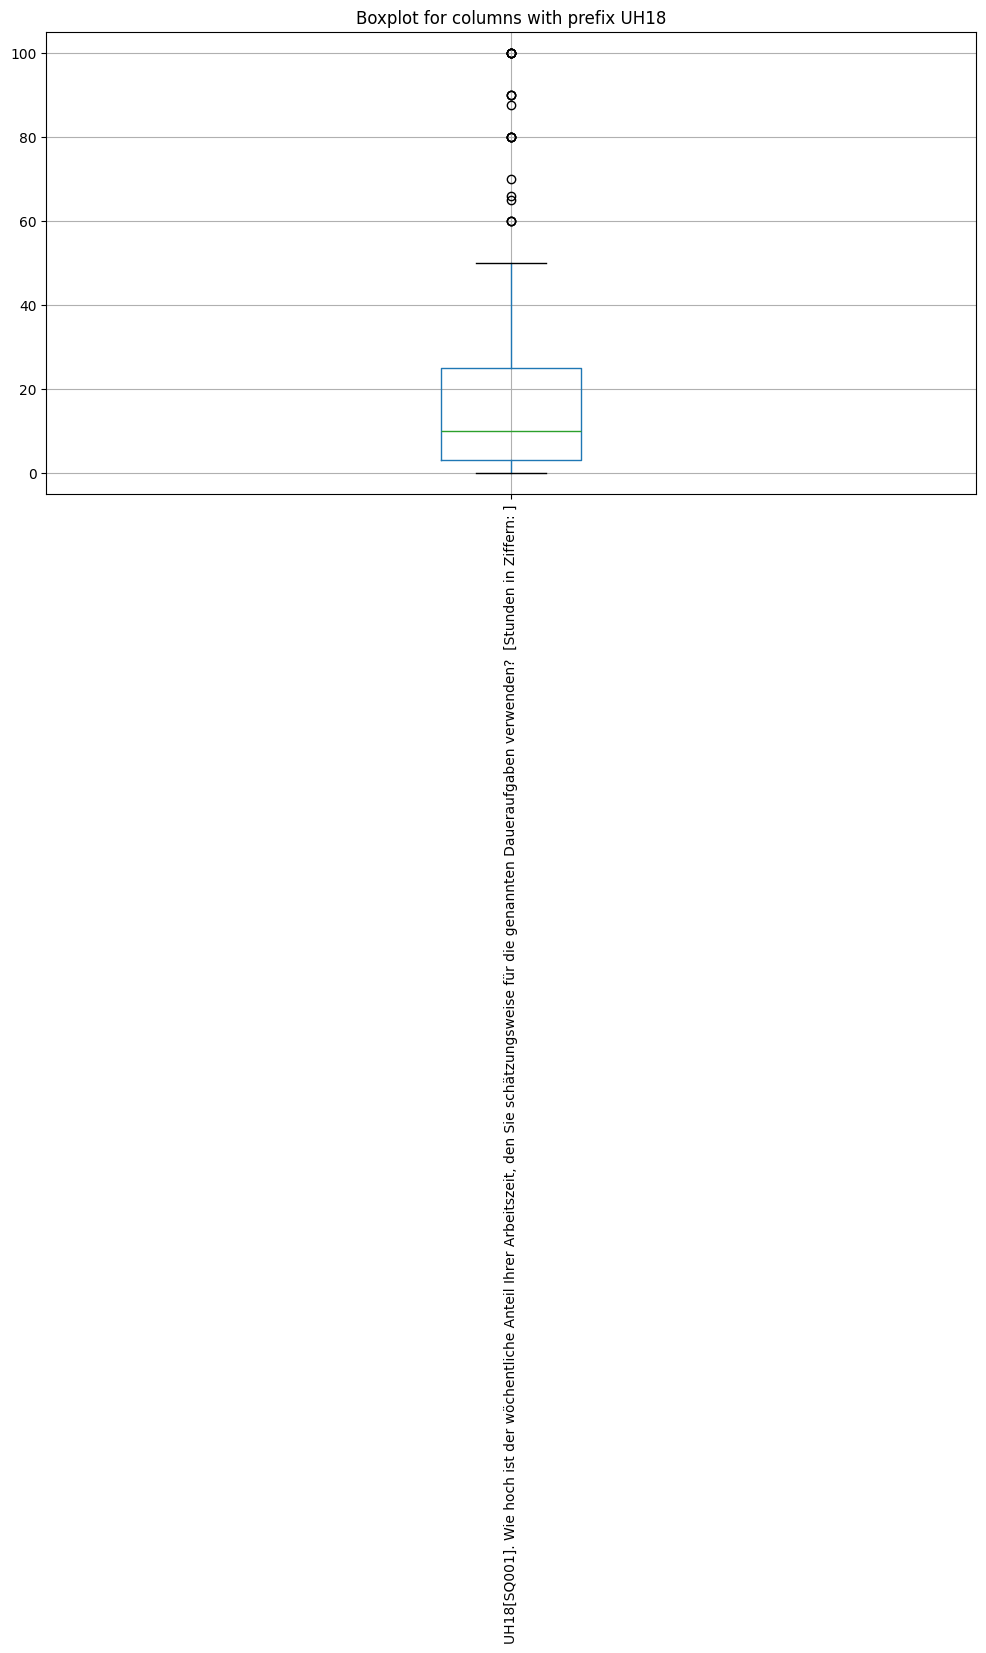

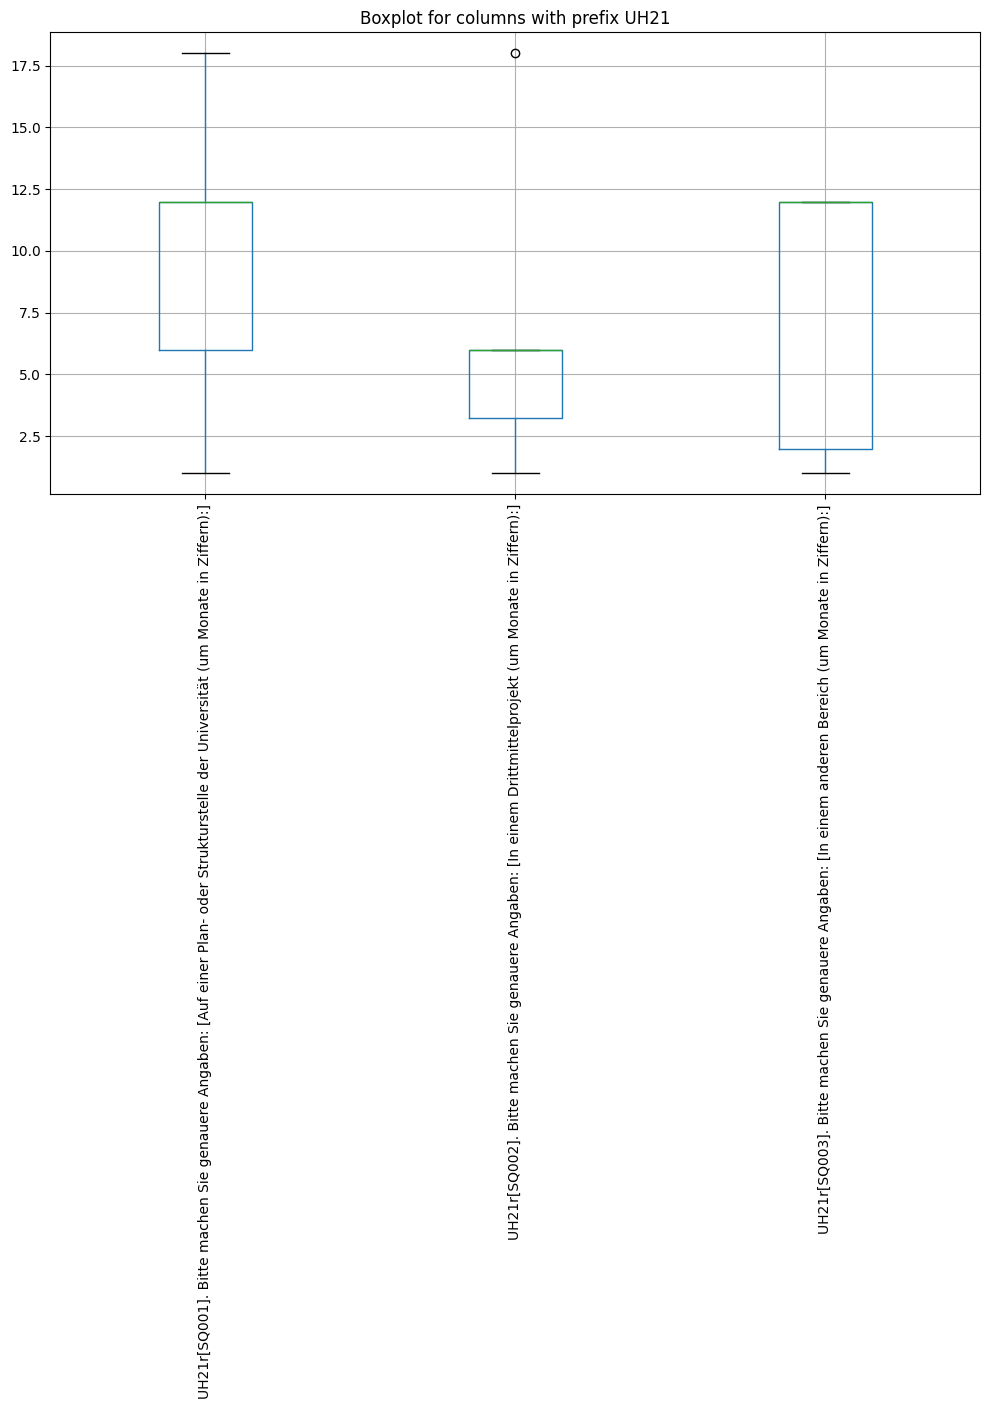

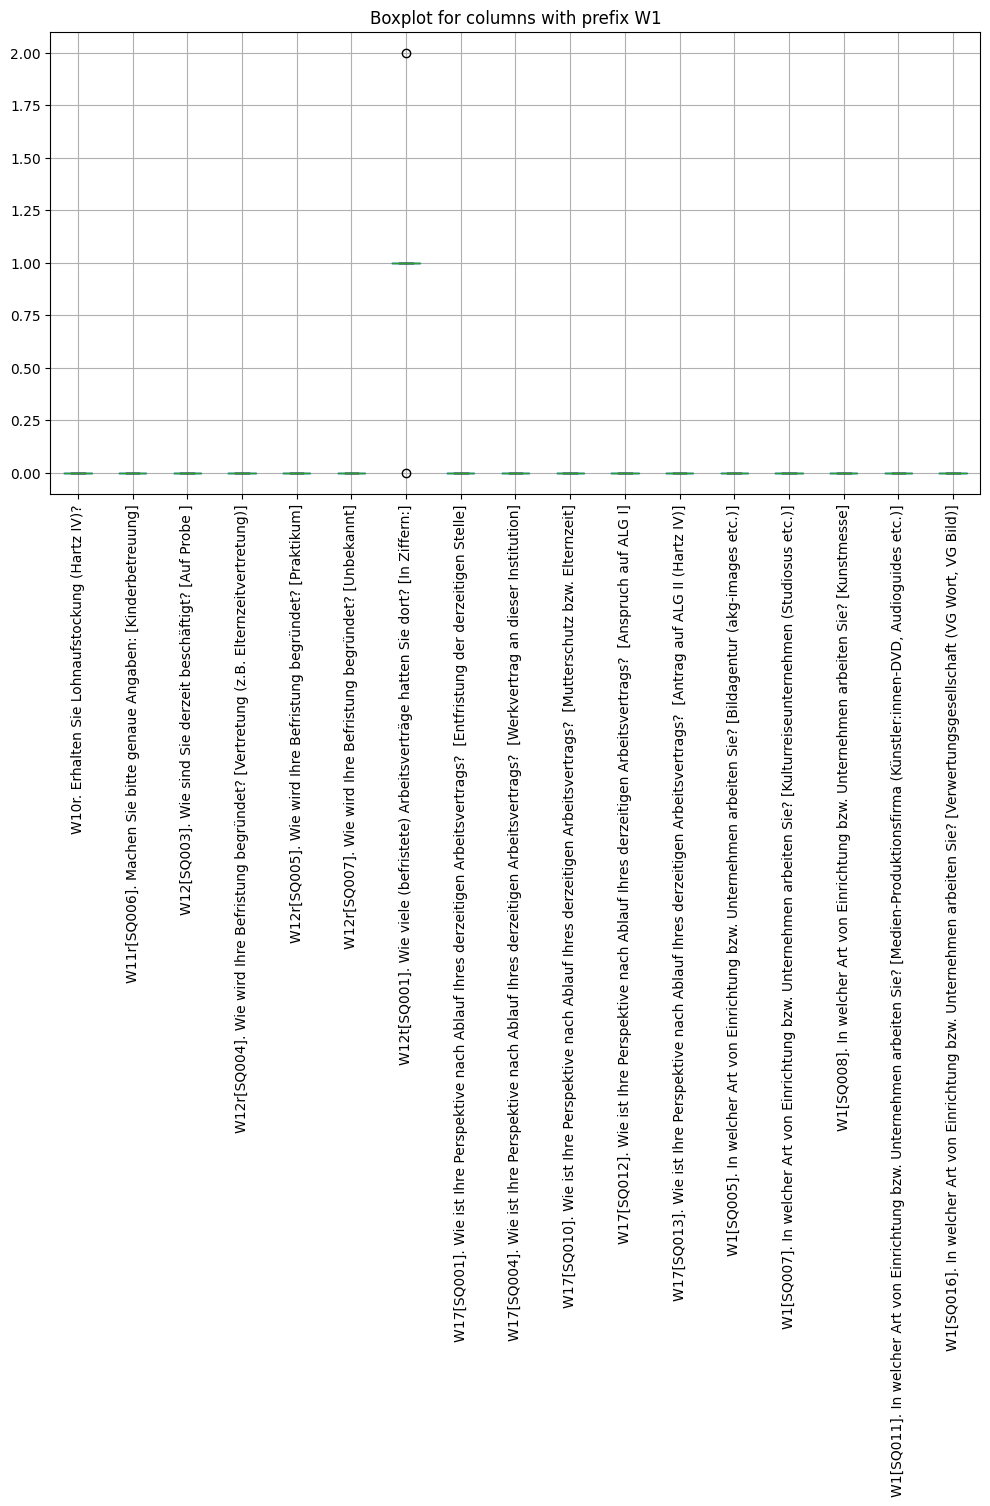

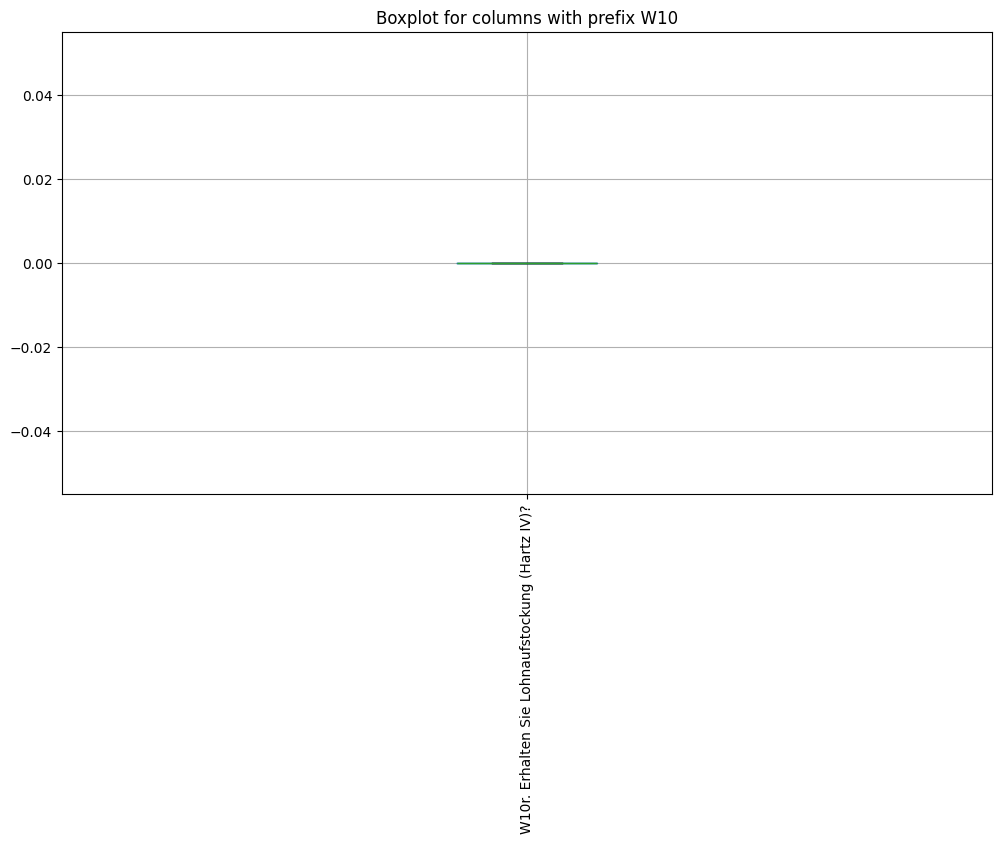

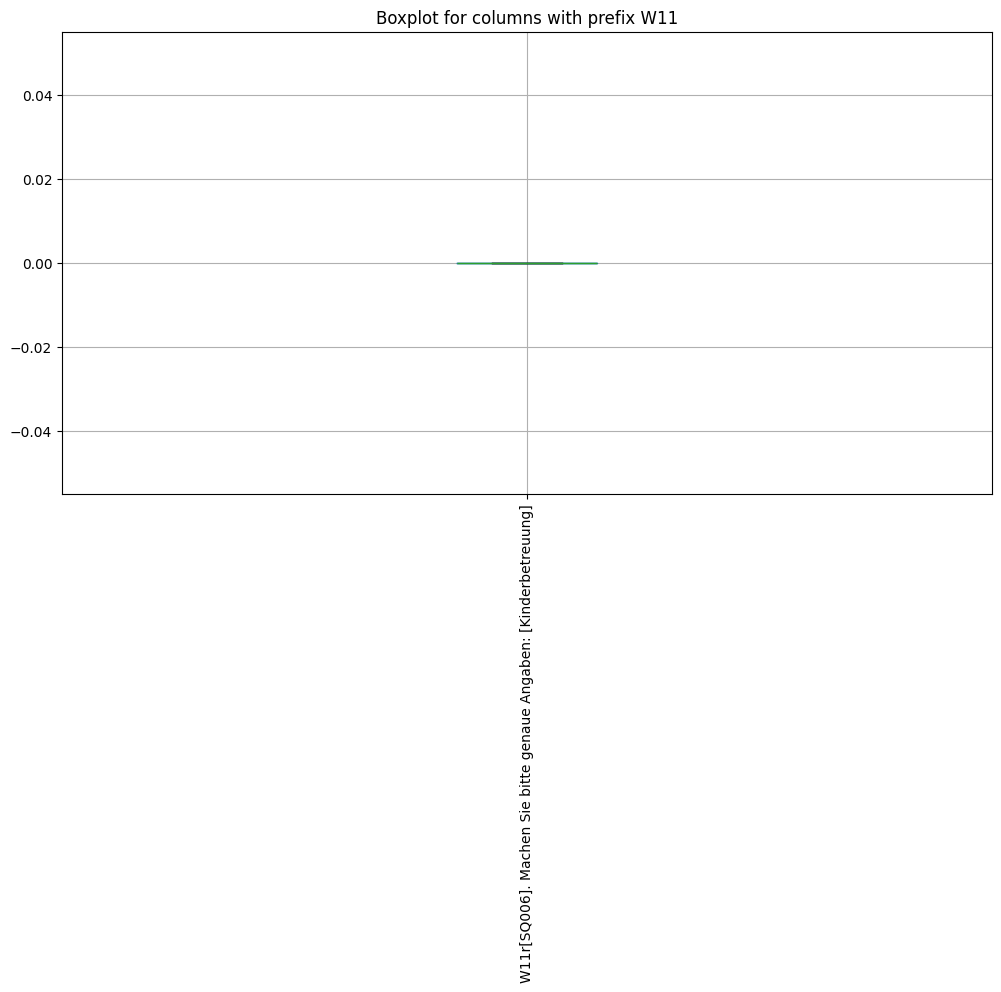

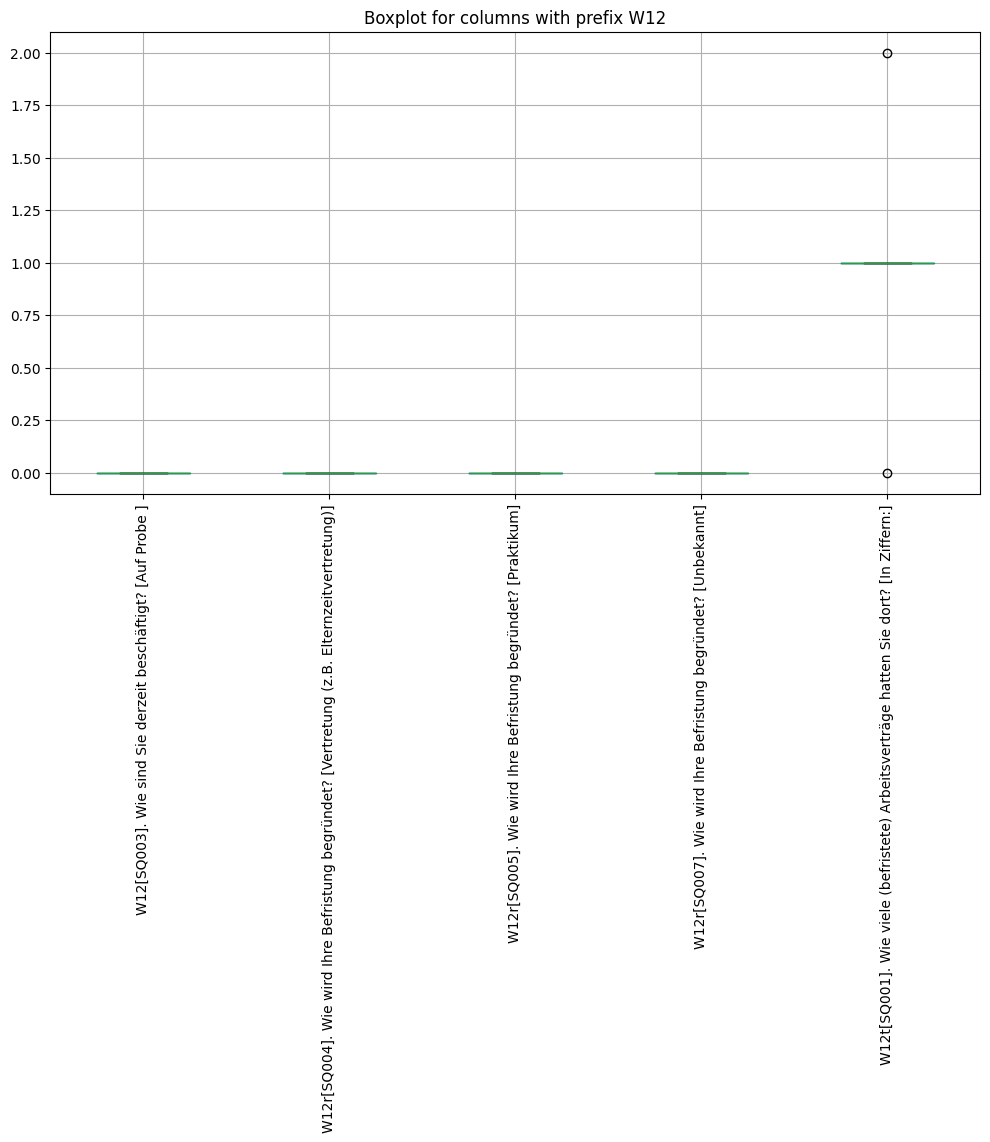

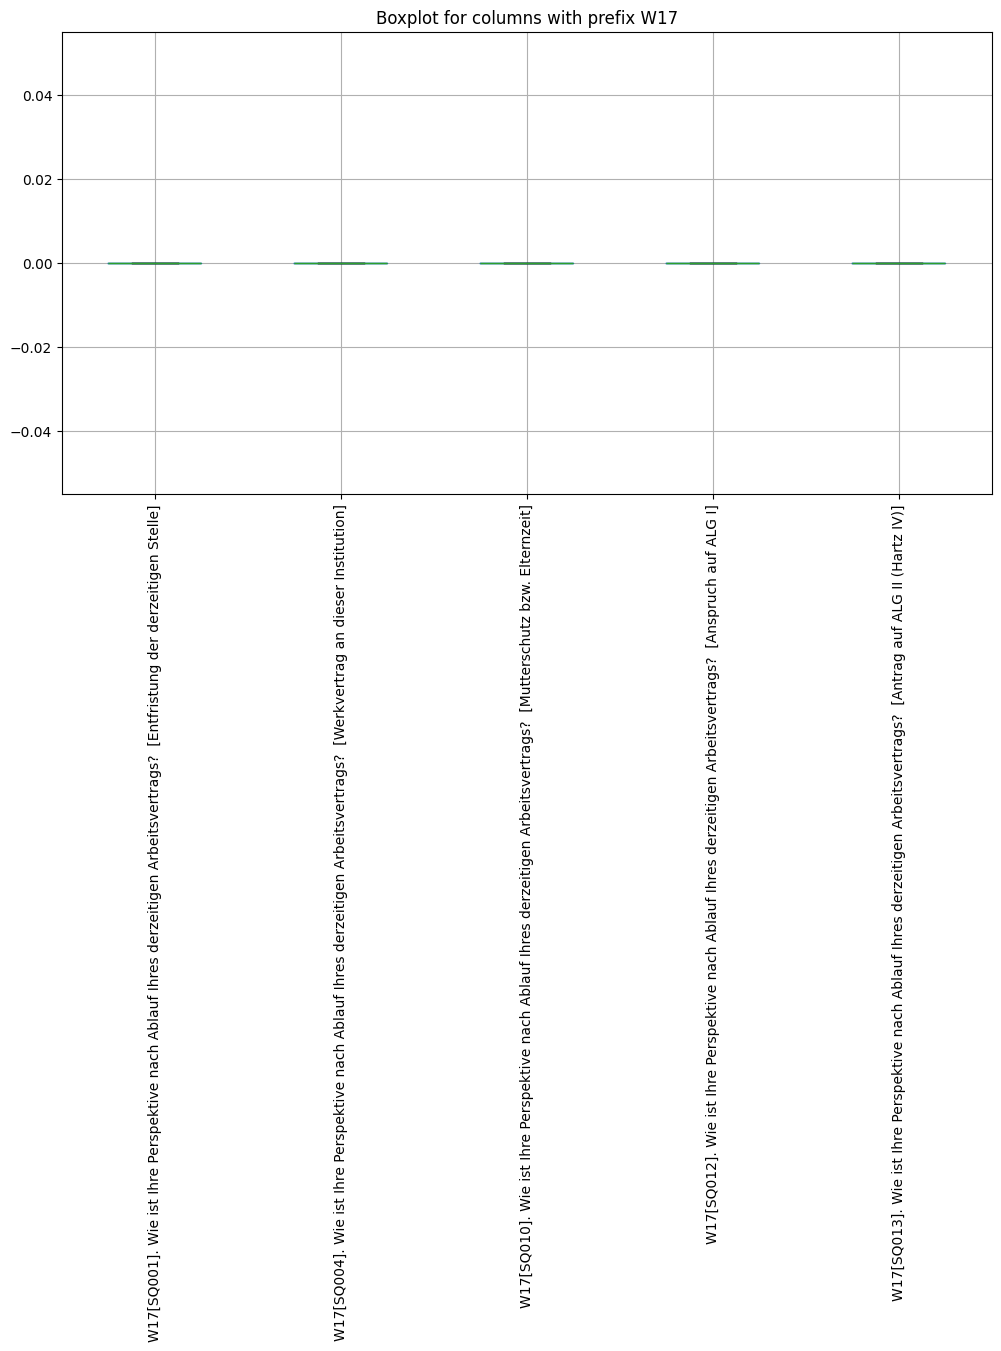

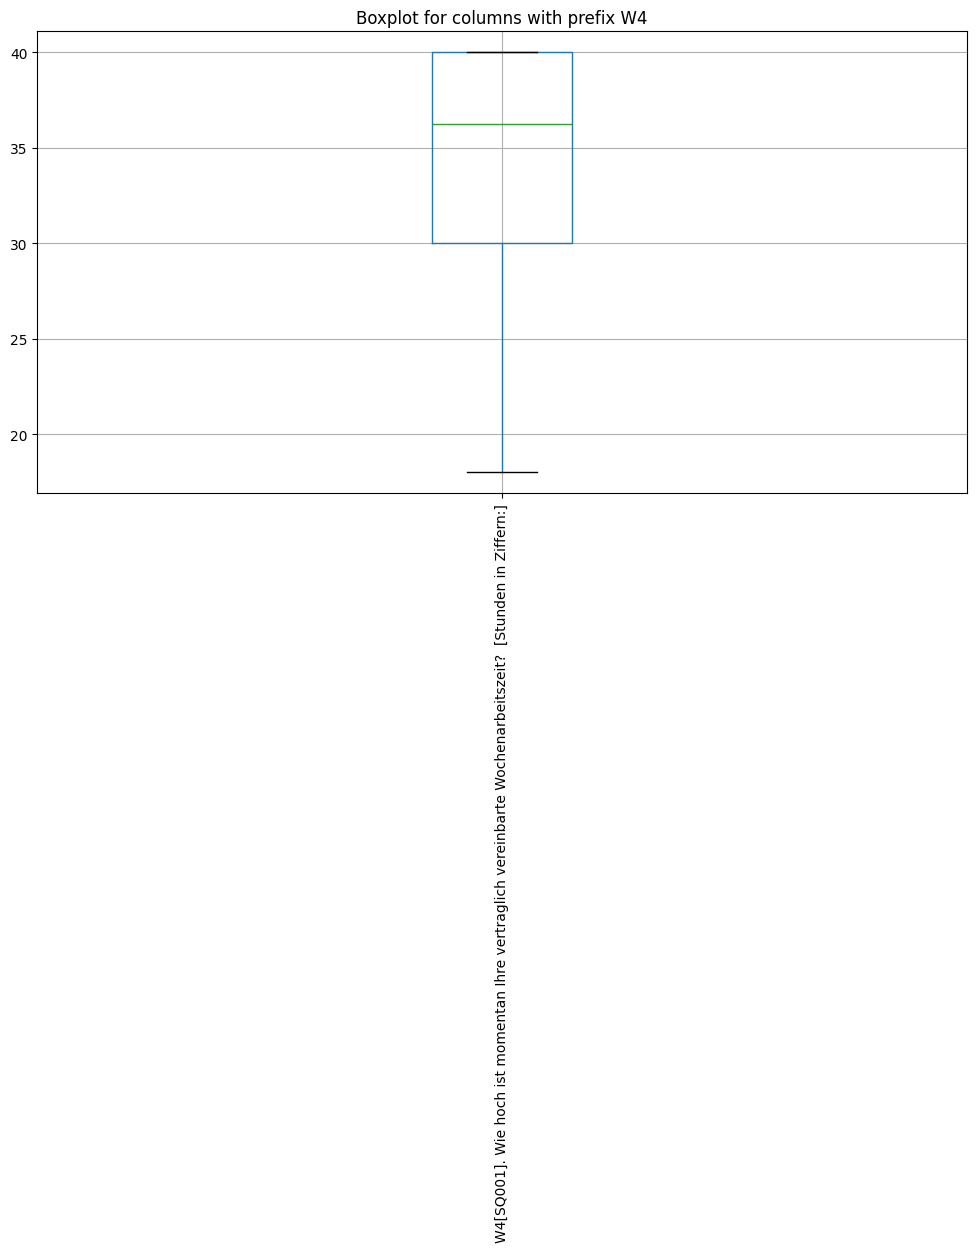

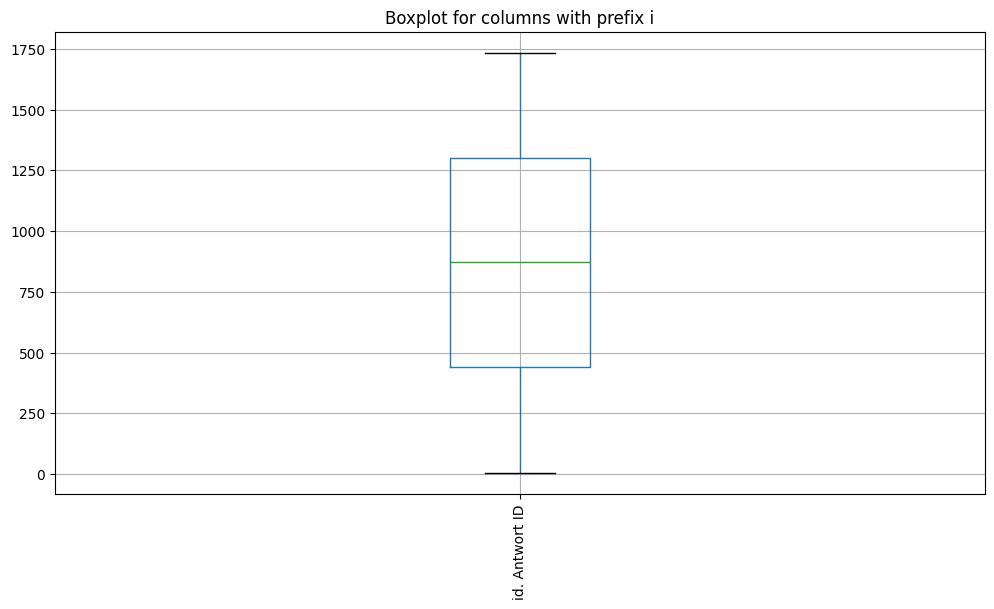

In [21]:
for prefix, columns in sorted_column_groups.items():
    if columns:  # Check if there are columns for this prefix
        plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
        df_numerical.boxplot(column=columns)
        plt.title(f'Boxplot for columns with prefix {prefix}')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.show()


In [22]:
with open('../data/interim/column_names.txt', mode='w', encoding='utf-8') as myfile:

    for item in df_numerical.columns:

        myfile.write(f"\n{item}")


### outlier inspection

In [23]:
df_numerical[df_numerical['AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]'] >= 5]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
421,1.0,1.0,11.0,1.0,1.0,40.0,19.5,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260
740,5.0,1.0,5.0,17.0,3.0,35.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447
801,2.0,1.0,7.0,5.0,4.0,48.0,32.0,7.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353
812,2.0,1.0,5.0,7.0,5.0,40.0,40.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
828,3.0,1.0,6.0,16.0,5.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058
983,8.0,1.0,10.0,20.0,2.0,40.0,40.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869
992,4.0,1.0,9.0,9.0,3.0,45.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1428


In [24]:
df_numerical[df_numerical['AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]'] >= 10]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
148,5.0,1.0,2.0,19.0,2.0,30.0,30.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174
153,10.0,1.0,1.0,25.0,1.0,20.0,18.5,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243
212,8.0,1.0,1.0,21.0,1.0,42.0,42.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,945
493,7.0,1.0,1.0,15.0,1.0,39.0,39.0,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1186
587,7.0,1.0,2.0,18.0,2.0,39.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995
632,7.0,1.0,3.0,20.0,3.0,60.0,40.0,0.5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1484
648,8.0,1.0,3.0,22.0,1.0,39.0,39.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
703,4.0,1.0,4.0,10.0,4.0,50.0,40.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252
740,5.0,1.0,5.0,17.0,3.0,35.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447
828,3.0,1.0,6.0,16.0,5.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058


In [25]:
df_numerical[df_numerical['AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ]'] >= 3]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
173,4.0,1.0,3.0,9.0,3.0,40.0,20.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310
334,2.0,1.0,3.0,5.0,3.0,60.0,38.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717
390,1.0,1.0,2.0,NaN,3.0,30.0,30.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1561
545,4.0,1.0,3.0,5.0,3.0,48.0,40.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
616,4.0,1.0,3.0,2.0,3.0,60.0,40.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1271
632,7.0,1.0,3.0,20.0,3.0,60.0,40.0,0.5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1484
703,4.0,1.0,4.0,10.0,4.0,50.0,40.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252
740,5.0,1.0,5.0,17.0,3.0,35.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447
753,1.0,1.0,4.0,4.0,3.0,45.0,19.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590
790,2.0,1.0,3.0,5.0,3.0,40.0,25.0,7.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486


In [26]:
df_numerical[df_numerical['AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?\xa0 [In Ziffern:]'] >= 61]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
219,3.0,0.0,NaN,NaN,NaN,65.0,39.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053
281,2.0,0.0,NaN,NaN,NaN,65.0,NaN,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480
286,NaN,0.0,NaN,NaN,NaN,65.0,41.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141
552,4.0,0.0,NaN,NaN,NaN,100.0,NaN,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,952
664,4.0,0.0,NaN,NaN,NaN,70.0,40.0,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235
820,3.0,0.0,NaN,NaN,NaN,70.0,38.5,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802
882,4.0,1.0,4.0,11.0,4.0,70.0,39.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527
926,1.0,0.0,NaN,NaN,NaN,65.0,40.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591
947,7.0,0.0,NaN,NaN,NaN,75.0,20.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1630
996,6.0,0.0,NaN,NaN,NaN,65.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466


In [27]:
df_numerical[df_numerical['AP11r[SQ001]. Wie viele Stunden davon bezahlt?\xa0\xa0 [In Ziffern:]'] >= 41]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
23,1.0,0.0,NaN,NaN,NaN,45.0,45.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
51,1.0,1.0,1.0,4.00,1.0,60.0,42.0,5.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
60,2.0,0.0,NaN,NaN,NaN,45.0,45.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,880
61,2.0,0.0,NaN,NaN,NaN,45.0,45.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884
83,1.0,0.0,NaN,NaN,NaN,60.0,60.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1164
88,2.0,0.0,NaN,NaN,NaN,45.0,45.0,NaN,0.0,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,153
96,3.0,0.0,NaN,NaN,NaN,45.0,45.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,164
107,1.0,0.0,NaN,NaN,NaN,60.0,50.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1558
158,2.0,1.0,1.0,0.25,1.0,42.0,42.0,3.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318
159,2.0,0.0,NaN,NaN,NaN,41.0,41.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334


In [28]:
df_numerical[df_numerical['AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche?\xa0 [In Ziffern:]'] >= 30]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
253,4.0,0.0,NaN,NaN,NaN,35.0,3.0,32.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1384
318,4.0,0.0,NaN,NaN,NaN,40.0,10.0,30.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539
449,NaN,0.0,NaN,NaN,NaN,35.0,17.5,40.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708
571,6.0,0.0,NaN,NaN,NaN,50.0,40.0,50.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630
600,10.0,0.0,NaN,NaN,NaN,30.0,0.0,30.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1035
609,6.0,0.0,NaN,NaN,NaN,30.0,25.0,30.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047
636,2.0,1.0,2.0,1.0,2.0,50.0,39.0,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1565
763,5.0,0.0,NaN,NaN,NaN,30.0,20.0,30.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842
887,6.0,0.0,NaN,NaN,NaN,40.0,0.0,40.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1522
928,7.0,0.0,NaN,NaN,NaN,35.0,30.0,45.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404


In [29]:
df_numerical[df_numerical['AP4[SQ001]. Wie viele Male sind Sie für die Wahrnehmung Ihrer Tätigkeit in eine andere Stadt (permanent oder temporär) umgezogen?\xa0  [Angabe in Ziffern:]'] >=10]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
306,2.0,0.0,NaN,NaN,NaN,48.0,40.0,10.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
632,7.0,1.0,3.0,20.0,3.0,60.0,40.0,0.5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1484
774,4.0,0.0,NaN,NaN,NaN,50.0,3.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1327
806,4.0,1.0,2.0,4.0,2.0,40.0,26.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485
967,3.0,NaN,NaN,NaN,NaN,20.0,20.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1657
996,6.0,0.0,NaN,NaN,NaN,65.0,39.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466


In [31]:
df_numerical[df_numerical['AP5r[SQ001]. Bitte machen Sie folgende Angaben:\xa0 [Wie viele Arbeitsverträge hatten Sie insgesamt in Ihrem bisherigen beruflichen Leben inne? (in Ziffern)?]']>=50]

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
1014,5.0,0.0,NaN,NaN,NaN,40.0,40.0,5.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913
1016,4.0,0.0,NaN,NaN,NaN,50.0,39.5,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1226


In [39]:
df_numerical[df_numerical['AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]']>=30].sort_values(by='AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]', ascending=False)

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
822,3.0,0.0,NaN,NaN,NaN,55.0,50.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
210,10.0,0.0,NaN,NaN,NaN,10.0,0.0,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915
358,8.0,0.0,NaN,NaN,NaN,21.0,21.0,NaN,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1098
833,9.0,0.0,NaN,NaN,NaN,55.0,55.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1313
419,7.0,0.0,NaN,NaN,NaN,44.0,44.0,4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250
975,7.0,0.0,NaN,NaN,NaN,32.0,32.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1209
881,8.0,0.0,NaN,NaN,NaN,45.0,35.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364
469,7.0,0.0,NaN,NaN,NaN,39.0,39.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923
69,7.0,0.0,NaN,NaN,NaN,36.0,36.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962
648,8.0,1.0,3.0,22.0,1.0,39.0,39.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


In [50]:
df_numerical[df_numerical['AP5r[SQ003]. Bitte machen Sie folgende Angaben:\xa0 [An wie vielen Institutionen (in Ziffern)? ]']>=10].sort_values(by='AP5r[SQ003]. Bitte machen Sie folgende Angaben:\xa0 [An wie vielen Institutionen (in Ziffern)? ]', ascending=False)

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
997,6.0,0.0,NaN,NaN,NaN,40.0,0.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536
993,7.0,0.0,NaN,NaN,NaN,42.0,35.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1292
907,8.0,1.0,1.0,2.0,1.0,45.0,40.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040
971,5.0,0.0,NaN,NaN,NaN,40.0,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916
948,5.0,0.0,NaN,NaN,NaN,42.0,32.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,676


In [53]:
df_numerical[df_numerical['AP7r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]']>=30].sort_values(by='AP7r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]', ascending=False)

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
318,4.0,0.0,NaN,NaN,NaN,40.0,10.0,30.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539
234,1.0,0.0,NaN,NaN,NaN,40.0,40.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201
196,8.0,1.0,1.0,2.5,1.0,50.0,12.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736


In [57]:
df_numerical[df_numerical['AP7r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]']>=30].sort_values(by='AP7r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]', ascending=False)

,AP1. Wie alt sind Sie?,AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?,AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?],AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?],AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ],AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche? [In Ziffern:],AP11r[SQ001]. Wie viele Stunden davon bezahlt? [In Ziffern:],AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche? [In Ziffern:],AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?,"AP13r[SQ001]. Wenn ja, in welcher Vereinigung: [Bundesverband der Gästeführer Deutschland]",...,W7[SQ002]. Welche Form von Vergütung erhalten Sie? [Bezahlung nach Stundenlohn],W7[SQ003]. Welche Form von Vergütung erhalten Sie? [Provision],W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],id. Antwort ID
430,1.0,0.0,NaN,NaN,NaN,25.0,21.0,10.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
131,NaN,0.0,NaN,NaN,NaN,4.0,4.0,10.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1715


In [59]:
df_numerical.iloc[131][[0,1,5,6,28,30,31,32, 38, 39]]

/tmp/ipykernel_21057/145486175.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_numerical.iloc[131][[0,1,5,6,28,30,31,32, 38, 39]]


AP1. Wie alt sind Sie?                                                                                                                                          NaN
AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt?                                           0.0
AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?  [In Ziffern:]                                                                   4.0
AP11r[SQ001]. Wie viele Stunden davon bezahlt?   [In Ziffern:]                                                                                                  4.0
AP4[SQ001]. Wie viele Male sind Sie für die Wahrnehmung Ihrer Tätigkeit in eine andere Stadt (permanent oder temporär) umgezogen?   [Angabe in Ziffern:]        2.0
AP5r[SQ001]. Bitte machen Sie folgende Angaben:  [Wie viele Arbeitsverträge hatten Sie insgesamt in Ihrem bisherigen beruflichen Leben inne? (in Ziffern)?]     1.0
AP5r[SQ002]. Bit

conspicious indices:
* 421 (25-29 Jahre alt, 11x im Ausland beschäftigt an einer Institution in einem Jahr)
* 552 (100 Stunden pro Woche Arbeitszeit: 14,3 Stunden x 7 Tage)
* 243 (150h pro Woche bezahlt an Universität)
* 571 (50h ehrenamtliches Engagement in der Woche)
* 636 (50h ehrenamtliches Engagement in der Woche)
* 928 (45h ehrenamtliches Engagement in der Woche)
* 1014 (120 Verträge in 20 Jahren)
* 1016 (274 Verträge in 20 Jahren)
* 822 (2011 Jahre Berufserfahrung)
* 318 (Alter 40-44, 150x Arbeitssuchend, 10 Jahre lang)
* 234 (Alter 25-29, 45x Arbeitssuchend in einem Jahr)
* 430 (Alter 25-29, 2020 Jahre arbeitssuchend)
* 

indices I'm not sure of:
* 390 (25-29 Jahre alt, 2x im Ausland beschäftigt ohne Zeitangabe bei 3 Insituten)
* 253 (32h Stunden Ehrenamt)
* alle, die mehr als 40h pro Woche bezahlt werden
* 306 (30-34, 13 mal umgezogen)
* 967 (35-39, 16 mal umgezogen)
* 196 (60-64, 35x arbeitssuchend, 20 Jahre lang)

In [ ]:
print(df_numerical.columns)

Index(['AP1. Wie alt sind Sie?',
       'AP10. Waren Sie als Kunstwissenschaftler:in an einer Institution im Ausland sozialversicherungspflichtig beschäftigt? ',
       'AP10r[SQ001]. Bitte machen Sie genauere Angaben: [Wie oft (in Ziffern)?]',
       'AP10r[SQ002]. Bitte machen Sie genauere Angaben: [Wie lange insgesamt (Jahre in Ziffern)?]',
       'AP10r[SQ003]. Bitte machen Sie genauere Angaben: [Bei wie vielen Institutionen (Anzahl in Ziffern)? ]',
       'AP11[SQ001]. Wie viele Stunden arbeiten Sie aktuell im Durchschnitt pro Woche?  [In Ziffern:]',
       'AP11r[SQ001]. Wie viele Stunden davon bezahlt?   [In Ziffern:]',
       'AP12r[SQ001]. Wie viele Stunden durchschnittlich pro Woche?  [In Ziffern:]',
       'AP13. Sind Sie Mitglied einer berufsbezogenen Vereinigung?',
       'AP13r[SQ001]. Wenn ja, in welcher Vereinigung:  [Bundesverband der Gästeführer Deutschland]',
       ...
       'W7[SQ002]. Welche Form von Vergütung erhalten Sie?  [Bezahlung nach Stundenlohn]',
       

In [ ]:
df_numerical.columns[[0, 1, 5, 6]]

NameError: name 'df_numerical' is not defined